In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
# Import necessary libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ajaykallepalli/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [70]:
rent = pd.read_csv('rent_cleaned_1.csv', index_col=0)

print(rent.head())

rent.info()

rent.describe()



   bedrooms  bathrooms  latitude  longitude   price  \
0       1.0        1.0   40.7108   -73.9539  2400.0   
1       2.0        1.0   40.7513   -73.9722  3800.0   
2       2.0        1.0   40.7575   -73.9625  3495.0   
3       3.0        1.5   40.7145   -73.9425  3000.0   
4       0.0        1.0   40.7439   -73.9743  2795.0   

                                            features interest_level  \
0  ['Dining Room', 'Pre-War', 'Laundry in Buildin...         medium   
1  ['Doorman', 'Elevator', 'Laundry in Building',...            low   
2  ['Doorman', 'Elevator', 'Laundry in Building',...         medium   
3                                                 []         medium   
4  ['Doorman', 'Elevator', 'Fitness Center', 'Lau...            low   

       display_address                                             photos  
0  145 Borinquen Place  ['https://photos.renthop.com/2/7170325_3bb5ac8...  
1            East 44th  ['https://photos.renthop.com/2/7092344_7663c19...  
2     East 56t

,bedrooms,bathrooms,latitude,longitude,price
count,48253.000000,48253.000000,48253.000000,48253.000000,48253.000000
mean,1.505896,1.175430,40.750775,-73.972380,3434.607403
std,1.087996,0.415307,0.039557,0.029559,1395.426605
min,0.000000,0.000000,40.571200,-74.094000,1025.000000
25%,1.000000,1.000000,40.728100,-73.991700,2495.000000
50%,1.000000,1.000000,40.751500,-73.977900,3100.000000
75%,2.000000,1.000000,40.774000,-73.954700,4000.000000
max,8.000000,3.500000,40.915400,-73.700100,9999.000000


Missing values in each column:
bedrooms             0
bathrooms            0
latitude             0
longitude            0
price                0
features             0
interest_level       0
display_address    132
photos              79
dtype: int64


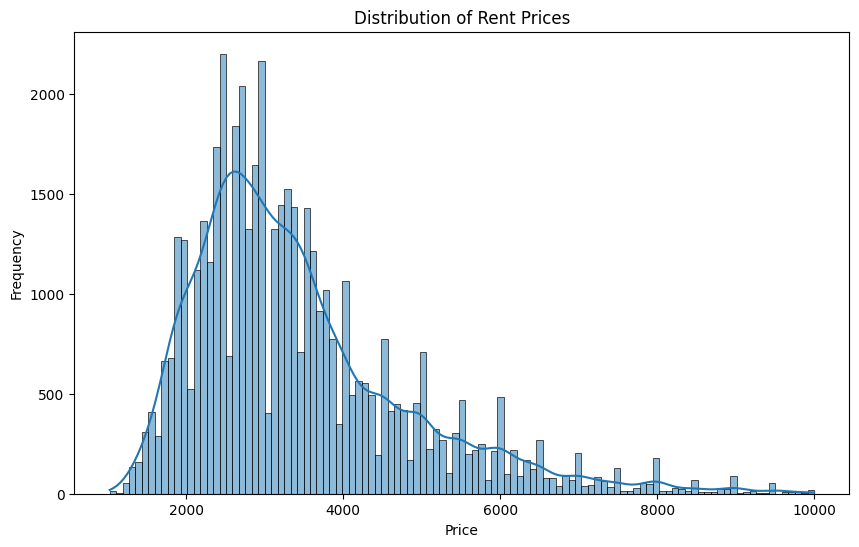

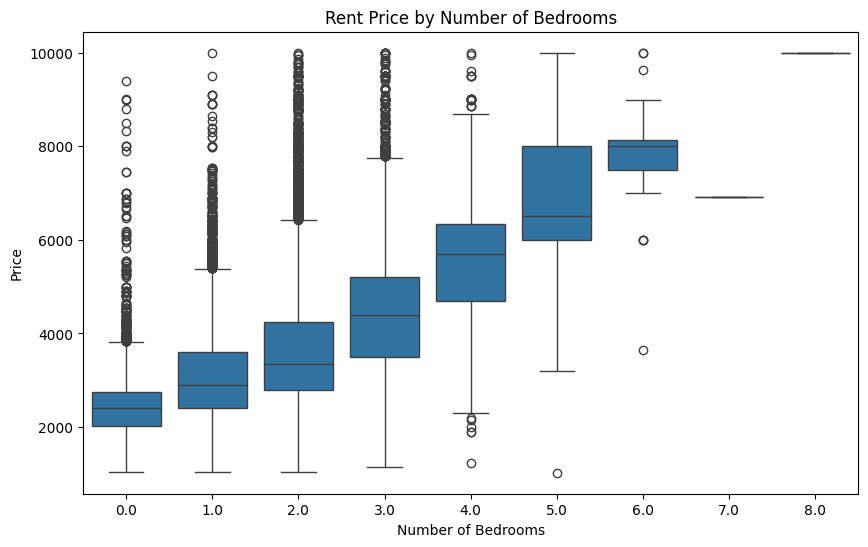

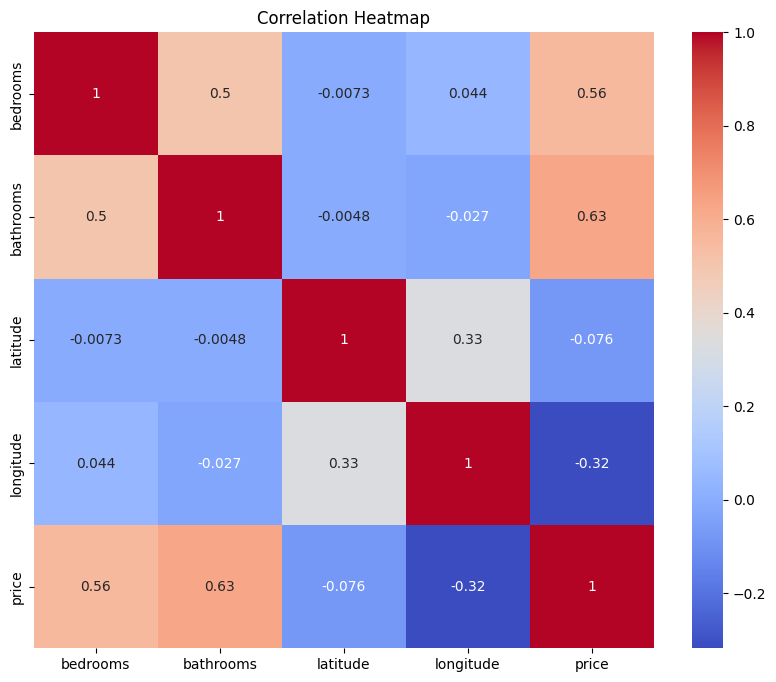

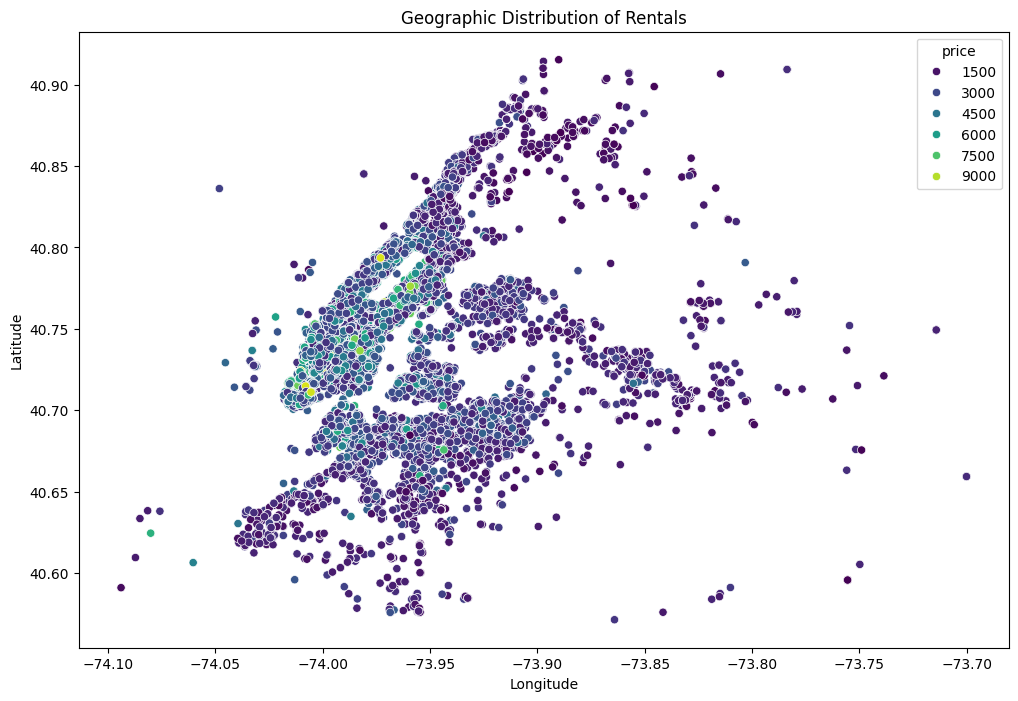


Summary statistics for numerical columns:
           bedrooms     bathrooms      latitude     longitude         price
count  48253.000000  48253.000000  48253.000000  48253.000000  48253.000000
mean       1.505896      1.175430     40.750775    -73.972380   3434.607403
std        1.087996      0.415307      0.039557      0.029559   1395.426605
min        0.000000      0.000000     40.571200    -74.094000   1025.000000
25%        1.000000      1.000000     40.728100    -73.991700   2495.000000
50%        1.000000      1.000000     40.751500    -73.977900   3100.000000
75%        2.000000      1.000000     40.774000    -73.954700   4000.000000
max        8.000000      3.500000     40.915400    -73.700100   9999.000000

Unique values in features:
features
[]                                                                                                                              3192
['Pre-War', 'Dogs Allowed', 'Cats Allowed']                                                            

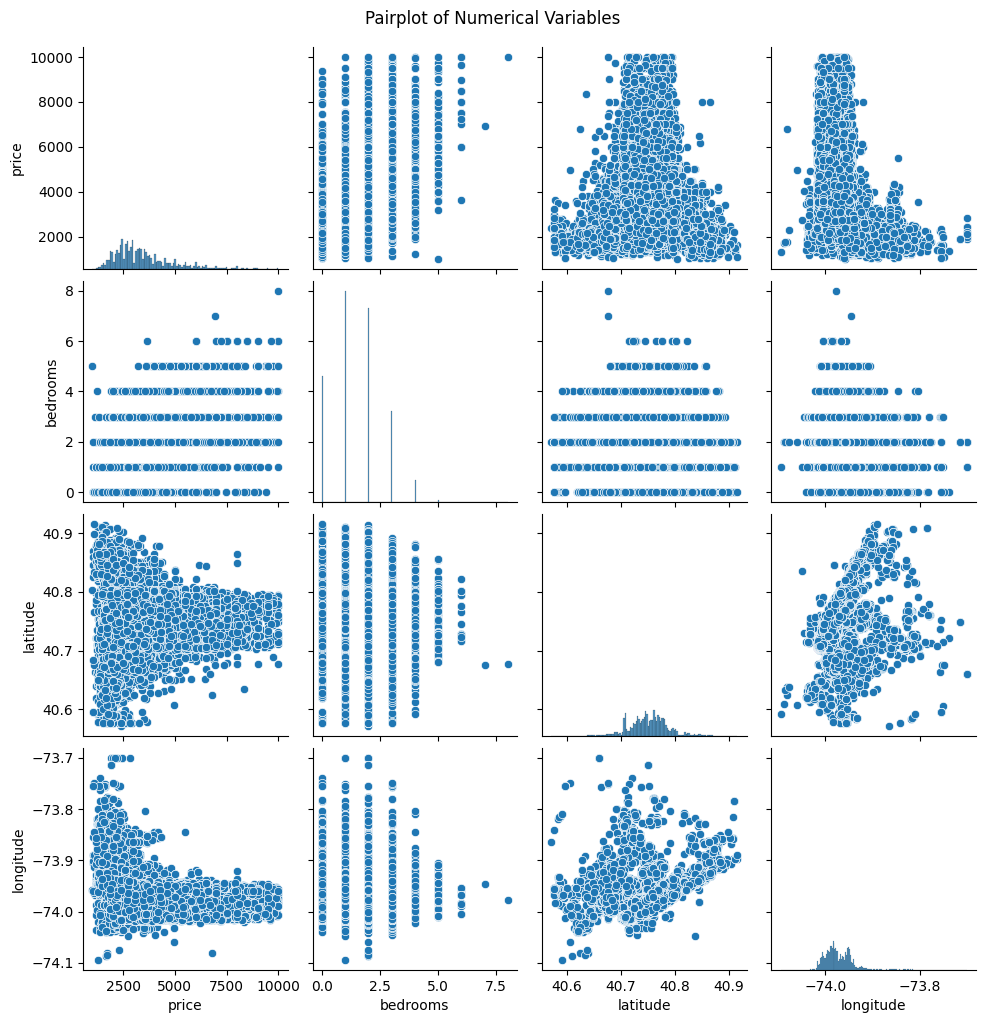

In [71]:
# Exploratory Data Analysis (EDA) on the rent dataframe

# 1. Check for missing values
print("Missing values in each column:")
print(rent.isnull().sum())

# 2. Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(rent['price'], kde=True)
plt.title('Distribution of Rent Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 3. Relationship between bedrooms and price
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=rent)
plt.title('Rent Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# 4. Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_columns = rent.select_dtypes(include=[np.number]).columns
sns.heatmap(rent[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# 5. Geographic distribution of rentals
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='price', data=rent, palette='viridis')
plt.title('Geographic Distribution of Rentals')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# 7. Price trends over time (assuming 'date' column exists)
if 'date' in rent.columns:
    rent['date'] = pd.to_datetime(rent['date'])
    rent.set_index('date', inplace=True)
    monthly_avg_price = rent.resample('M')['price'].mean()
    plt.figure(figsize=(12, 6))
    monthly_avg_price.plot()
    plt.title('Average Rent Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.show()

# 8. Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(rent.describe())

# 9. Unique values in categorical columns
categorical_columns = rent.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(rent[col].value_counts())

# 10. Pairplot for numerical columns
sns.pairplot(rent[['price', 'bedrooms', 'latitude', 'longitude']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


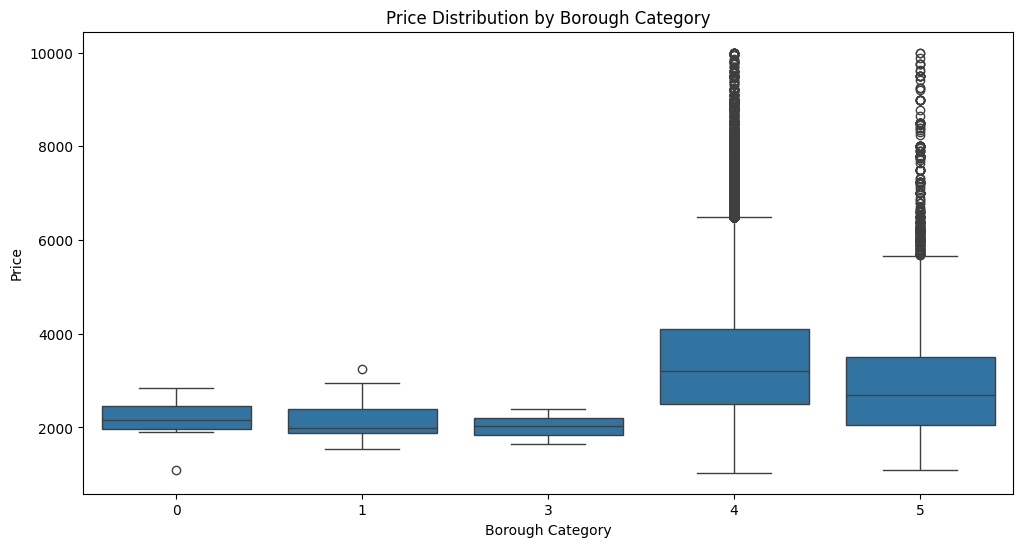

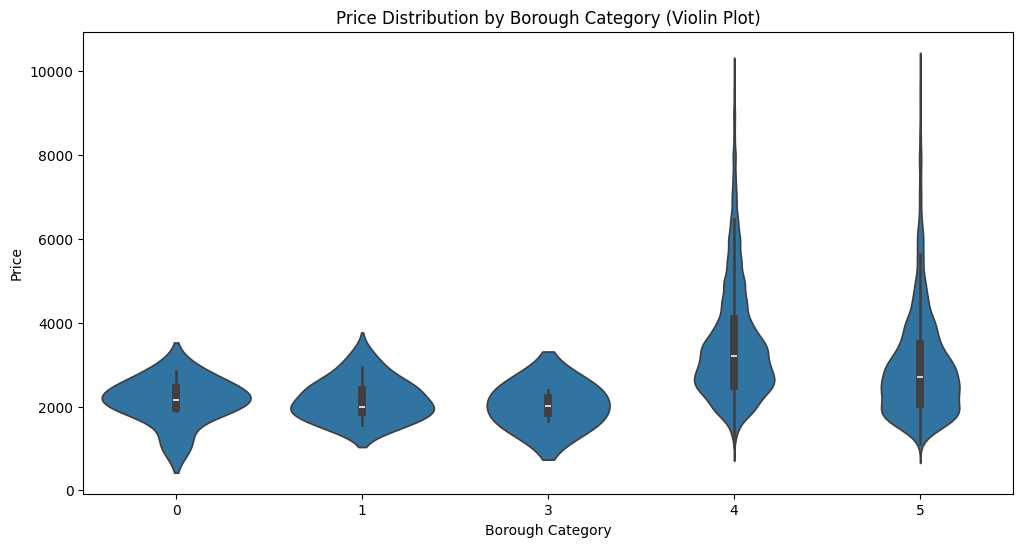

/opt/homebrew/anaconda3/envs/spacy/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 85.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/envs/spacy/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 55.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

In [106]:
rent.head()
# Create a box plot of Price vs Borough Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='borough_cat', y='price', data=rent)
plt.title('Price Distribution by Borough Category')
plt.xlabel('Borough Category')
plt.ylabel('Price')
plt.show()

# Create a violin plot of Price vs Borough Category
plt.figure(figsize=(12, 6))
sns.violinplot(x='borough_cat', y='price', data=rent)
plt.title('Price Distribution by Borough Category (Violin Plot)')
plt.xlabel('Borough Category')
plt.ylabel('Price')
plt.show()

# Create a swarm plot of Price vs Borough Category
plt.figure(figsize=(12, 6))
sns.swarmplot(x='borough_cat', y='price', data=rent, size=2, alpha=0.5)
plt.title('Price Distribution by Borough Category (Swarm Plot)')
plt.xlabel('Borough Category')
plt.ylabel('Price')
plt.show()

# Calculate and print average price per borough category
avg_price_by_borough = rent.groupby('borough_cat')['price'].mean().sort_values(ascending=False)
print("\nAverage Price by Borough Category:")
print(avg_price_by_borough)

# Create a bar plot of average price by borough category
plt.figure(figsize=(10, 6))
avg_price_by_borough.plot(kind='bar')
plt.title('Average Price by Borough Category')
plt.xlabel('Borough Category')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()



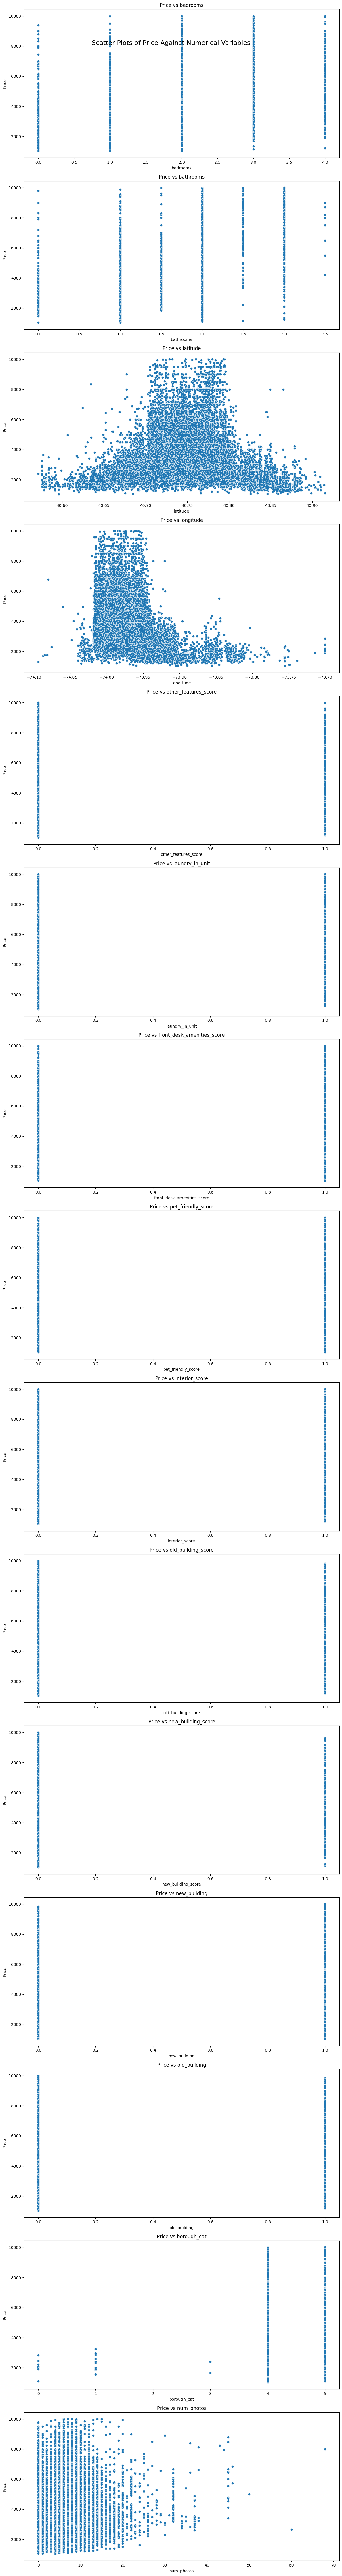

TypeError: unhashable type: 'list'

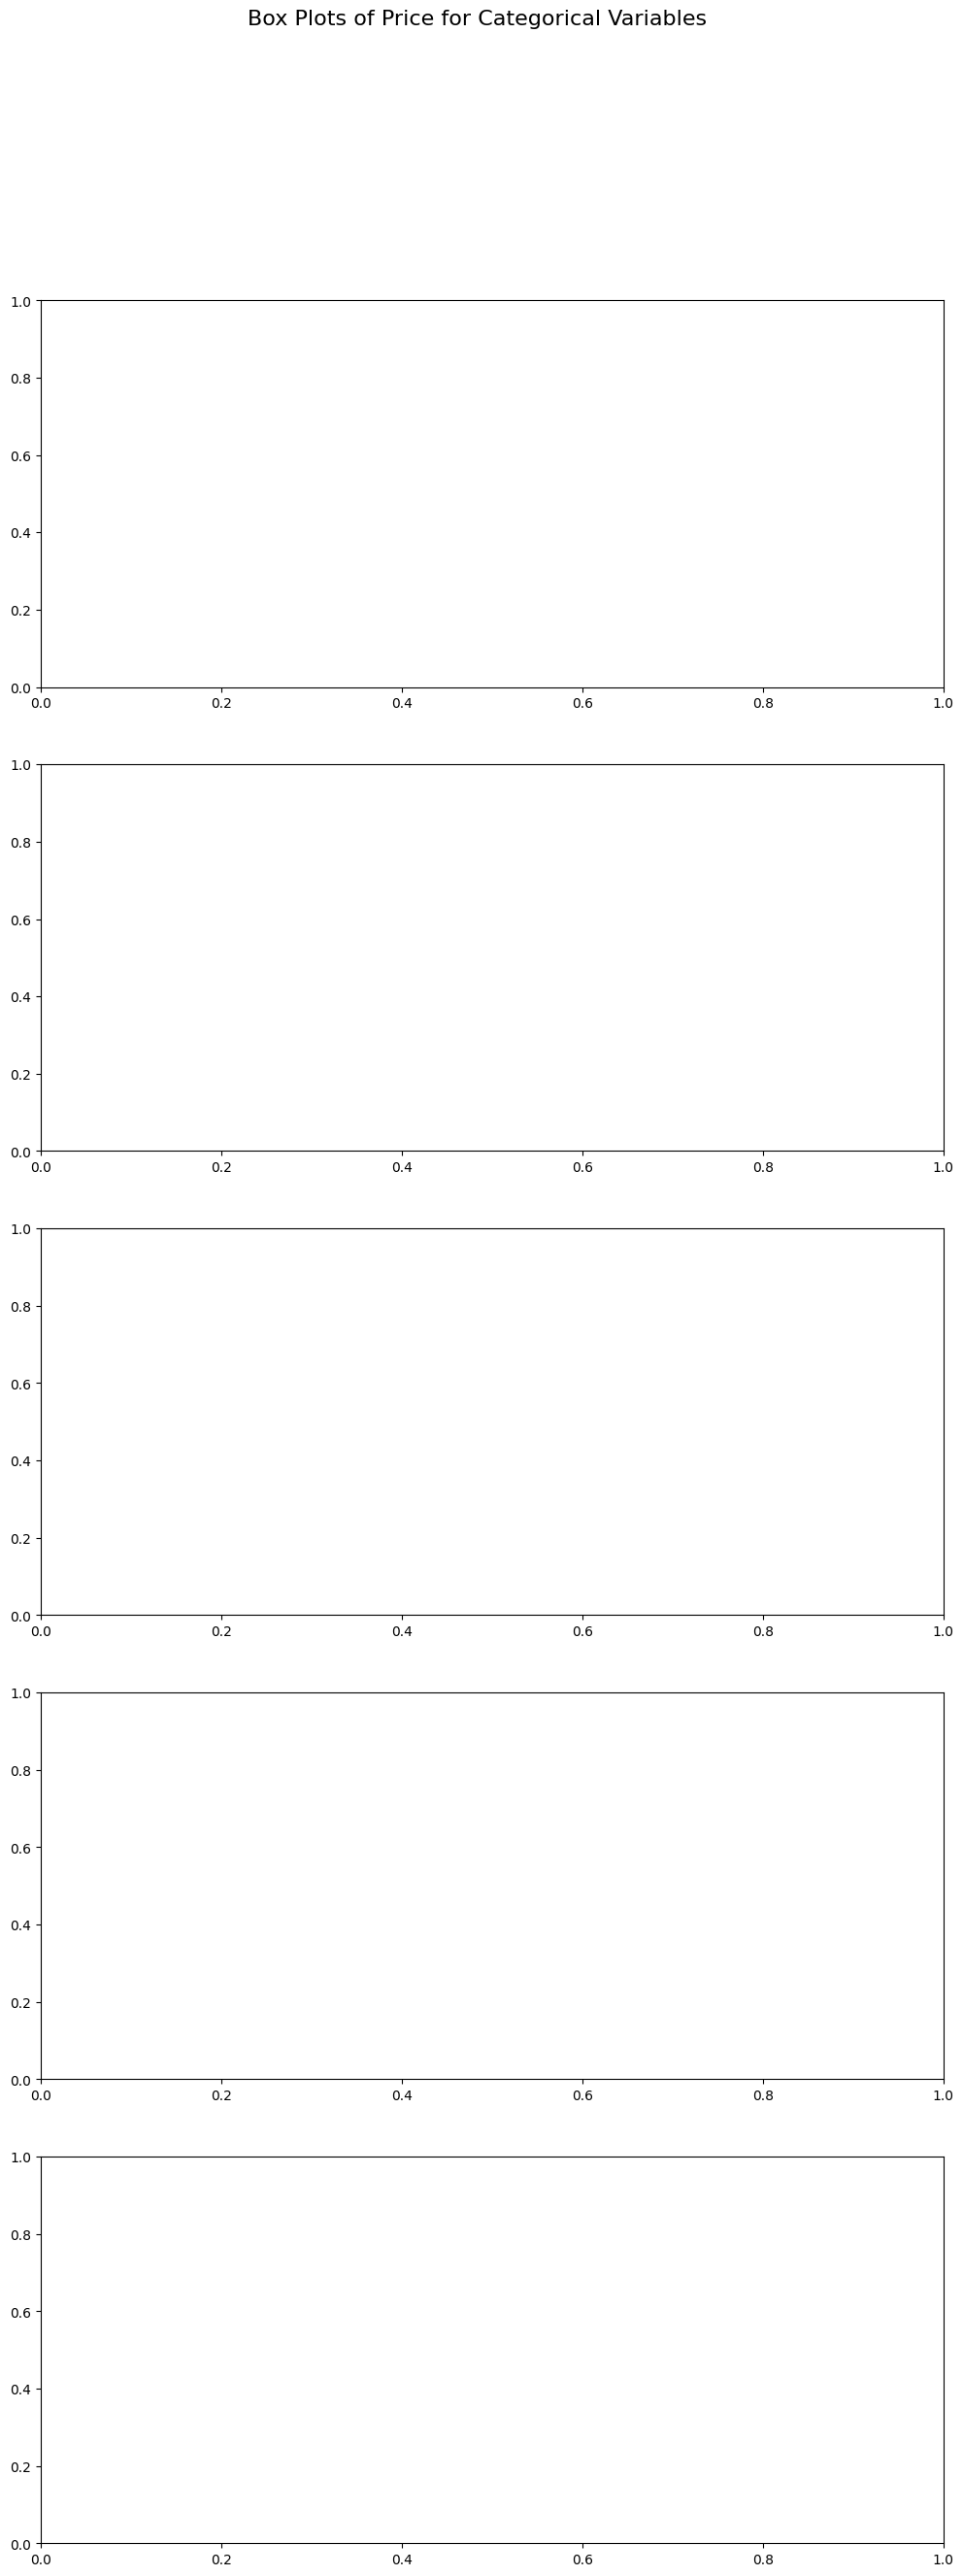

In [104]:
# 11. Scatter plots of price against all numerical variables
numerical_columns = rent.select_dtypes(include=[np.number]).columns
numerical_columns = [col for col in numerical_columns if col != 'price']

fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(12, 6*len(numerical_columns)), squeeze=False)
fig.suptitle('Scatter Plots of Price Against Numerical Variables', fontsize=16)

for i, col in enumerate(numerical_columns):
    sns.scatterplot(x=col, y='price', data=rent, ax=axes[i, 0])
    axes[i, 0].set_title(f'Price vs {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Price')

plt.tight_layout()
plt.show()

# 12. Box plots of price for categorical variables
categorical_columns = rent.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(12, 6*len(categorical_columns)), squeeze=False)
fig.suptitle('Box Plots of Price for Categorical Variables', fontsize=16)

for i, col in enumerate(categorical_columns):
    sns.boxplot(x=col, y='price', data=rent, ax=axes[i, 0])
    axes[i, 0].set_title(f'Price Distribution by {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Price')
    axes[i, 0].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [72]:
# ### Add a map of New York as the background

# # import folium
# import folium
# from folium.plugins import MarkerCluster

# # Create a base map centered on New York City
# ny_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# # Create a marker cluster
# marker_cluster = MarkerCluster().add_to(ny_map)

# # Add markers for each rental
# for idx, row in rent.iterrows():
#     folium.CircleMarker(
#         location=[row['latitude'], row['longitude']],
#         radius=5,
#         popup=f"Price: ${row['price']}",
#         color='blue',
#         fill=True,
#         fillColor='blue'
#     ).add_to(marker_cluster)

# # Save the map
# ny_map.save("new_york_rentals_map.html")
# # Display the map (this will work in a Jupyter notebook)
# from IPython.display import IFrame
# IFrame(src="new_york_rentals_map.html", width=800, height=600)


# #find Display the map (this will work in a Jupyter notebook)
# from IPython.display import IFrame
# IFrame(src="new_york_rentals_map.html", width=800, height=600)
# # 5. Geographic distribution of rentals
# plt.figure(figsize=(12, 8))
# sns.scatterpplot(x='longitude', y='latitude', hue='price', data=rent, palette='viridis')
# plt.title('Geographic Distribution of Rentals')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()

Type of first element in features column: <class 'list'>
First few elements of features column:
0    [Dining Room, Pre-War, Laundry in Building, Di...
1    [Doorman, Elevator, Laundry in Building, Dishw...
2    [Doorman, Elevator, Laundry in Building, Laund...
3                                                   []
4    [Doorman, Elevator, Fitness Center, Laundry in...
Name: features, dtype: object


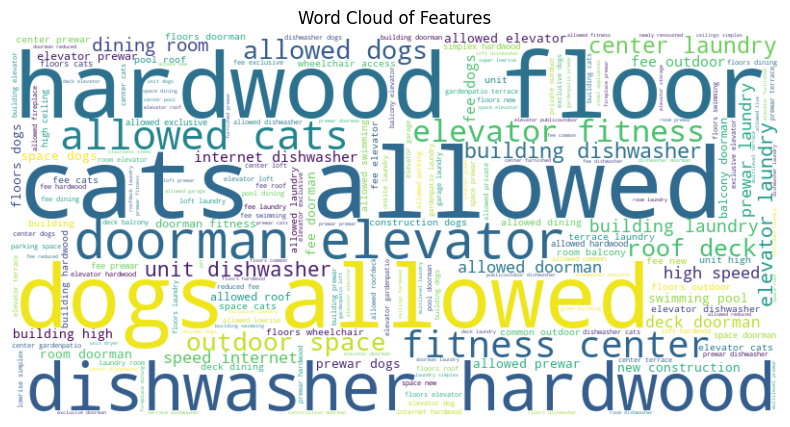


Top 20 Features by Frequency:
                     Count
Elevator             25111
Cats Allowed         23049
Hardwood Floors      22893
Dogs Allowed         21558
Doorman              20105
Dishwasher           19746
No Fee               17521
Laundry in Building  15853
Fitness Center       12728
Pre-War               8964
Laundry in Unit       8138
Roof Deck             6303
Outdoor Space         4998
Dining Room           4661
High Speed Internet   4142
Balcony               2821
Laundry In Building   2563
Swimming Pool         2557
New Construction      2438
Exclusive             2102


In [73]:
# 11. Generate word cloud from features and create a table of unique counts


# Combine all features into a single string
# Convert each row of features to a list
# rent['features'] = rent['features'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# print(type(rent['features'].values[0]))
# Convert features string to list if it's a string
rent['features'] = rent['features'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Verify the conversion
print(f"Type of first element in features column: {type(rent['features'].iloc[0])}")
print(f"First few elements of features column:\n{rent['features'].head()}")


# Combine all features into a single string
all_features = ' '.join([' '.join(features) for features in rent['features'] if isinstance(features, list)])

# Clean and preprocess the text
all_features = re.sub(r'[^\w\s]', '', all_features.lower())


#Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_features)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Features')
plt.show()

# Create a table of unique feature counts
feature_counts = Counter([feature for features in rent['features'] if isinstance(features, list) for feature in features])
feature_df = pd.DataFrame.from_dict(feature_counts, orient='index', columns=['Count'])
feature_df = feature_df.sort_values('Count', ascending=False)

print("\nTop 20 Features by Frequency:")
print(feature_df.head(20))







In [74]:
feature_df[feature_df['Count'] > 10].tail(100)

,Count
Live-in Super,78
EXPOSED BRICK,75
Childrens Playroom,74
Short Term Allowed,74
Lounge,72
...,...
Laundry On Floor,11
Shared backyard,11
Skylight,11
garage,11


In [75]:

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize, lowercase, and clean a string
def clean_and_lemmatize(text):
    # Convert to lowercase and remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    # Lemmatize each word
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

# Apply cleaning, lemmatization, and lowercase to the index (feature names)
feature_df.index = feature_df.index.map(clean_and_lemmatize)

# Group by the new index and sum the counts
feature_df = feature_df.groupby(feature_df.index).sum()

# Remove duplicates (keeping the one with the highest count)
feature_df = feature_df.loc[~feature_df.index.duplicated(keep='first')]

# Sort the DataFrame
feature_df = feature_df.sort_values('Count', ascending=False)


In [76]:
# Filter the DataFrame for features with Count > 200
filtered_df = feature_df[feature_df['Count'] > 200]

# Save the filtered DataFrame to a CSV file
filtered_df.to_csv('features_count_over_200.csv', index=True)

print("Features with Count > 200 have been saved to 'features_count_over_200.csv'")

Features with Count > 200 have been saved to 'features_count_over_200.csv'


In [77]:
# Save the filtered DataFrame to a CSV file
filtered_df.to_csv('filtered_features.csv', index=True)

print("Filtered features have been saved to 'filtered_features.csv'")

# Display the first few rows of the filtered DataFrame
print(filtered_df.head())

Filtered features have been saved to 'filtered_features.csv'
                Count
elevator        25469
cat allowed     23049
hardwood floor  22927
dog allowed     21558
doorman         20182


### Cleaning and Lemmatizing features per row

In [78]:
lemmatizer = WordNetLemmatizer()

# Function to clean and lemmatize text
def clean_and_lemmatize(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Split the text into words
    words = text.split()
    # Lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # Join the lemmatized words back into a string
    return ' '.join(lemmatized_words)

# Assuming 'rent' is your DataFrame containing the rental listings
# and 'features' is the column containing the rent features as a list of strings

# Apply the clean_and_lemmatize function to each feature in the 'features' column

rent['cleaned_features'] = rent['features'].apply(lambda x: [clean_and_lemmatize(feature) for feature in x])

In [79]:
rent['cleaned_features'].head()

0    [dining room, prewar, laundry in building, dis...
1    [doorman, elevator, laundry in building, dishw...
2    [doorman, elevator, laundry in building, laund...
3                                                   []
4    [doorman, elevator, fitness center, laundry in...
Name: cleaned_features, dtype: object

### Adding score features

In [80]:
def count_strings_in_list(column, word_list):
    """
    Count how many strings from word_list match (using regex) anywhere in each list of the given column.
    
    Parameters:
    column (pandas.Series): A column containing lists of strings
    word_list (list): A list of words to count
    
    Returns:
    pandas.Series: An integer series indicating the count of words from word_list found in each row
    """
    return column.apply(lambda x: sum(any(re.search(word, item, re.IGNORECASE) for item in x) for word in word_list))


In [81]:
## Other features
# Other features
other_features = [
    'high speed internet',
    'loft',
    'high ceiling',
    'reduced fee',
    'simplex',
    'lowrise',
    'multilevel',
    'green building'
]

# Count occurrences of other features
rent['other_features_score'] = count_strings_in_list(rent['cleaned_features'], other_features)

# Convert other_features_score to binary (0 if no outdoor features, 1 if any outdoor features)
rent['other_features_score'] = (rent['other_features_score'] > 0).astype(int)


In [82]:
## Laundry
## Laundry
laundry_features = [
    'laundry in unit',
    #'laundry in building',
    #'laundry room',
    #'onsite laundry',
    #'laundry'
]

# Count occurrences of laundry features
rent['laundry_in_unit'] = count_strings_in_list(rent['cleaned_features'], laundry_features)
# Convert laundry_score to binary (0 if no outdoor features, 1 if any outdoor features)
rent['laundry_in_unit'] = (rent['laundry_in_unit'] > 0).astype(int)


In [83]:
## Front desk amenities
front_desk_amenities = [
    'front desk',
    'elevator',
    'doorman',
    'wheelchair access',
    'concierge',
    'valet',
    'package service',
    'lobby attendant',
    'virtual doorman',
    'mail room'
]

# Count occurrences of building amenities
rent['front_desk_amenities_score'] = count_strings_in_list(rent['cleaned_features'], front_desk_amenities)
# Convert front_desk to binary (0 if no outdoor features, 1 if any outdoor features)
rent['front_desk_amenities_score'] = (rent['front_desk_amenities_score'] > 0).astype(int)

In [84]:
## Pet friendly score
pet_friendly_words = [
    'pet', 'dog', 'cat', 'pet friendly', 'dog friendly', 'cat friendly',
    'pet park', 'dog run', 'pet grooming', 'pet spa', 'pet washing station',
    'pet sitting', 'pet daycare', 'pet walking service', 'pet treats',
    'pet waste station', 'pet relief area', 'pet playground'
]
rent['pet_friendly_score'] = count_strings_in_list(rent['cleaned_features'], pet_friendly_words)

# Convert pet_friendly to binary (0 if no outdoor features, 1 if any outdoor features)
rent['pet_friendly_score'] = (rent['pet_friendly_score'] > 0).astype(int)

In [85]:
## Interior
interior_features = [
    'hardwood floor',
    'dining room',
    'hardwood',
    'fireplace',
    'furnished',
    'storage',
    'dishwasher',
    'high ceilings',
    'walk-in closet',
    'marble bathroom',
    'stainless steel appliances',
    'granite countertops',
    'exposed brick',
    'crown molding',
    'recessed lighting',
    'bay windows',
    'built-in bookshelves',
    'open floor plan',
    'renovated kitchen',
    'central air conditioning'
]

# Count occurrences of interior features
rent['interior_score'] = count_strings_in_list(rent['cleaned_features'], interior_features)

# Convert interior_score to binary (0 if no outdoor features, 1 if any outdoor features)
rent['interior_score'] = (rent['interior_score'] > 0).astype(int)

In [86]:
# ## Amenities and Outdoor Features
# amenities_outdoor_features = [
#     'fitness center', 'swimming pool', 'parking space', 'gym', 'sauna',
#     'jacuzzi', 'bike storage', 'concierge', 'lounge', 'game room',
#     'business center', 'package room', 'valet parking', 'children\'s playroom',
#     'storage units', 'cinema room', 'yoga studio', 'terrace', 'garden',
#     'patio', 'common outdoor space', 'private outdoor space', 'roofdeck',
#     'public outdoor', 'outdoor space', 'roof deck', 'backyard', 'courtyard',
#     'balcony', 'deck', 'rooftop', 'green space', 'landscaped garden',
#     'outdoor seating area', 'outdoor kitchen', 'outdoor dining area', 'playground'
# ]

# # Count occurrences of amenities/outdoor features
# rent['amenities_outdoor_score'] = count_strings_in_list(rent['cleaned_features'], amenities_outdoor)

# # Convert outdoor_score to binary (0 if no outdoor features, 1 if any outdoor features)
# rent['amenities_outdoor_score'] = (rent['amenities_outdoor_score'] > 0).astype(int)


In [87]:
## Old building score
old_building_features = ['pre-war', 'prewar', 'brownstone', 'walk-up']
rent['old_building_score'] = count_strings_in_list(rent['cleaned_features'], old_building_features)

# Convert old_building_score to binary (0 if no outdoor features, 1 if any outdoor features)
rent['old_building_score'] = (rent['old_building_score'] > 0).astype(int)


In [88]:
## New building score
new_building_features = ['new construction', 'modern', 'brand new']
rent['new_building_score'] = count_strings_in_list(rent['cleaned_features'], new_building_features)

# Convert new_building_score to binary (0 if no new features, 1 if any new features)
rent['new_building_score'] = (rent['new_building_score'] > 0).astype(int)

In [89]:
# Define features for new and old buildings
new_building_features = ['elevator', 'doorman', 'dishwasher', 'fitness center', 'laundry in unit', 'swimming pool', 'new construction', 'wheelchair access', 'garage']
old_building_features = ['prewar', 'high ceiling', 'fireplace', 'laundry room']
# Create new categorical variables
# Create new categorical variable for new buildings
rent['new_building'] = rent['cleaned_features'].apply(lambda x: 1 if any(feature in x for feature in new_building_features) else 0)

# Create new categorical variable for old buildings
rent['old_building'] = rent['cleaned_features'].apply(lambda x: 1 if any(feature in x for feature in old_building_features) else 0)

# If a building is classified as old, set new_building to 0
rent.loc[rent['old_building'] == 1, 'new_building'] = 0

# Display the first few rows to verify the changes
print(rent[['old_building', 'new_building']].head(10))

# Display the first few rows to verify
print(rent[['new_building', 'old_building']].head())


   old_building  new_building
0             1             0
1             0             1
2             0             1
3             0             0
4             0             1
5             0             1
6             1             0
7             0             1
8             0             0
9             0             0
   new_building  old_building
0             0             1
1             1             0
2             1             0
3             0             0
4             1             0


In [90]:
rent.head()


,bedrooms,bathrooms,latitude,longitude,price,features,interest_level,display_address,photos,cleaned_features,other_features_score,laundry_in_unit,front_desk_amenities_score,pet_friendly_score,interior_score,old_building_score,new_building_score,new_building,old_building
0,1.0,1.0,40.7108,-73.9539,2400.0,"[Dining Room, Pre-War, Laundry in Building, Di...",medium,145 Borinquen Place,['https://photos.renthop.com/2/7170325_3bb5ac8...,"[dining room, prewar, laundry in building, dis...",0,0,0,1,1,1,0,0,1
1,2.0,1.0,40.7513,-73.9722,3800.0,"[Doorman, Elevator, Laundry in Building, Dishw...",low,East 44th,['https://photos.renthop.com/2/7092344_7663c19...,"[doorman, elevator, laundry in building, dishw...",0,0,1,0,1,0,0,1,0
2,2.0,1.0,40.7575,-73.9625,3495.0,"[Doorman, Elevator, Laundry in Building, Laund...",medium,East 56th Street,['https://photos.renthop.com/2/7158677_c897a13...,"[doorman, elevator, laundry in building, laund...",0,1,1,0,1,0,0,1,0
3,3.0,1.5,40.7145,-73.9425,3000.0,[],medium,Metropolitan Avenue,['https://photos.renthop.com/2/7211212_1ed4542...,[],0,0,0,0,0,0,0,0,0
4,0.0,1.0,40.7439,-73.9743,2795.0,"[Doorman, Elevator, Fitness Center, Laundry in...",low,East 34th Street,['https://photos.renthop.com/2/7225292_901f198...,"[doorman, elevator, fitness center, laundry in...",0,0,1,0,0,0,0,1,0


In [91]:
# # Sum all the scores
# rent['total_score'] = rent['other_features_score'] + rent['laundry_score'] + rent['pet_friendly_score'] + rent['interior_score'] + rent['amenities_outdoor_score'] + rent['outdoor_score'] + rent['old_building_score'] + rent['new_building_score']

# rent.head()

# # Save the updated DataFrame to a new CSV file
# rent.to_csv('rent_with_scores.csv', index=False)

# print("DataFrame with scores has been saved to 'rent_with_scores.csv'")


In [92]:
# rent[rent['total_score'] < 3].sort_values('total_score', ascending=False)

In [93]:
def get_borough(lat, lon):
    if (40.9176 >= lat >= 40.7850) and (-73.9105 >= lon >= -74.2591):  # Bronx
        return 5
    elif (40.9153 >= lat >= 40.5763) and (-73.7004 >= lon >= -74.2591):  # Manhattan
        return 4
    elif (40.8500 >= lat >= 40.5000) and (-73.7004 >= lon >= -73.9500):  # Queens
        return 3
    elif (40.7410 >= lat >= 40.5600) and (-74.0500 >= lon >= -74.2591):  # Staten Island
        return 2
    elif (40.739446 >= lat >= 40.541722) and (-73.951442 >= lon >= -74.044582):  # Brooklyn
        return 1
    else:
        return 0  # For any lat/lon outside the defined ranges
# Apply the function to each row in the dataframe
rent['borough_cat'] = rent.apply(lambda row: get_borough(row['latitude'], row['longitude']), axis=1)
# Display the updated dataframe
rent.head()



,bedrooms,bathrooms,latitude,longitude,price,features,interest_level,display_address,photos,cleaned_features,other_features_score,laundry_in_unit,front_desk_amenities_score,pet_friendly_score,interior_score,old_building_score,new_building_score,new_building,old_building,borough_cat
0,1.0,1.0,40.7108,-73.9539,2400.0,"[Dining Room, Pre-War, Laundry in Building, Di...",medium,145 Borinquen Place,['https://photos.renthop.com/2/7170325_3bb5ac8...,"[dining room, prewar, laundry in building, dis...",0,0,0,1,1,1,0,0,1,4
1,2.0,1.0,40.7513,-73.9722,3800.0,"[Doorman, Elevator, Laundry in Building, Dishw...",low,East 44th,['https://photos.renthop.com/2/7092344_7663c19...,"[doorman, elevator, laundry in building, dishw...",0,0,1,0,1,0,0,1,0,4
2,2.0,1.0,40.7575,-73.9625,3495.0,"[Doorman, Elevator, Laundry in Building, Laund...",medium,East 56th Street,['https://photos.renthop.com/2/7158677_c897a13...,"[doorman, elevator, laundry in building, laund...",0,1,1,0,1,0,0,1,0,4
3,3.0,1.5,40.7145,-73.9425,3000.0,[],medium,Metropolitan Avenue,['https://photos.renthop.com/2/7211212_1ed4542...,[],0,0,0,0,0,0,0,0,0,4
4,0.0,1.0,40.7439,-73.9743,2795.0,"[Doorman, Elevator, Fitness Center, Laundry in...",low,East 34th Street,['https://photos.renthop.com/2/7225292_901f198...,"[doorman, elevator, fitness center, laundry in...",0,0,1,0,0,0,0,1,0,4


In [94]:
import ast
# remove nan values
rent['photos'] = rent['photos'].fillna('[]')
rent['photos'] = rent['photos'].apply(ast.literal_eval)

In [95]:
# Create num_photos variable with the length of the photos column
# Create num_photos variable with the length of the photos column, excluding float values
rent['num_photos'] = rent['photos'].apply(lambda x: len(x) if isinstance(x, list) else 0)


# Display the first few rows to verify
print(rent[['photos', 'num_photos']].head())

                                              photos  num_photos
0  [https://photos.renthop.com/2/7170325_3bb5ac84...          12
1  [https://photos.renthop.com/2/7092344_7663c19a...           6
2  [https://photos.renthop.com/2/7158677_c897a134...           6
3  [https://photos.renthop.com/2/7211212_1ed4542e...           5
4  [https://photos.renthop.com/2/7225292_901f1984...           4



Percentage distribution for interest_level:
interest_level
low       68.866184
medium    23.208920
high       7.924896
Name: proportion, dtype: float64


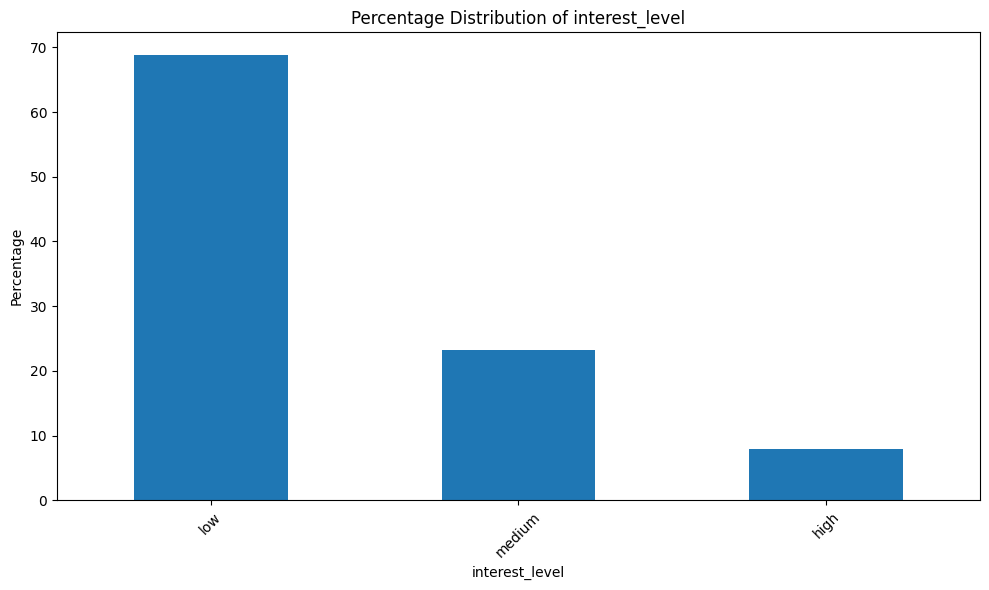


Percentage distribution for borough_cat:
borough_cat
4    86.214329
5    13.719354
1     0.045593
0     0.016579
3     0.004145
Name: proportion, dtype: float64


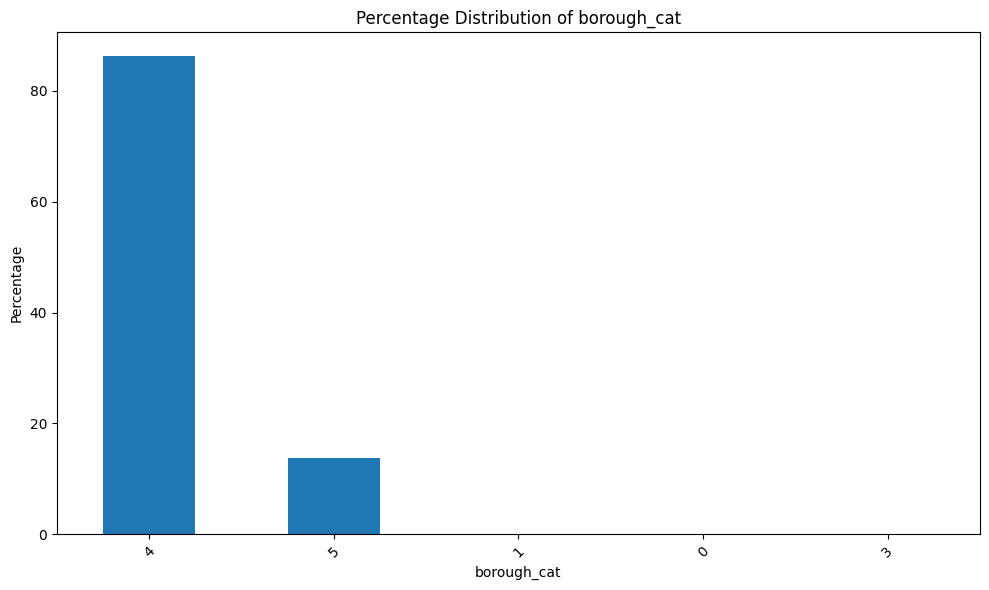


Percentage distribution for num_photos:
num_photos
5     17.851740
4     16.142002
6     13.650965
7      9.943423
3      9.317555
8      7.987068
0      7.485545
9      3.487866
10     2.737654
2      2.702423
1      2.356330
12     1.599901
11     1.510787
13     0.762647
14     0.445568
15     0.377179
16     0.298427
18     0.236255
17     0.217603
20     0.165793
22     0.151286
32     0.126417
19     0.103621
21     0.041448
26     0.039376
37     0.037303
25     0.035231
23     0.031086
24     0.031086
45     0.024869
28     0.020724
27     0.014507
34     0.010362
30     0.010362
29     0.008290
38     0.008290
36     0.006217
35     0.006217
46     0.004145
60     0.002072
44     0.002072
68     0.002072
43     0.002072
50     0.002072
31     0.002072
Name: proportion, dtype: float64


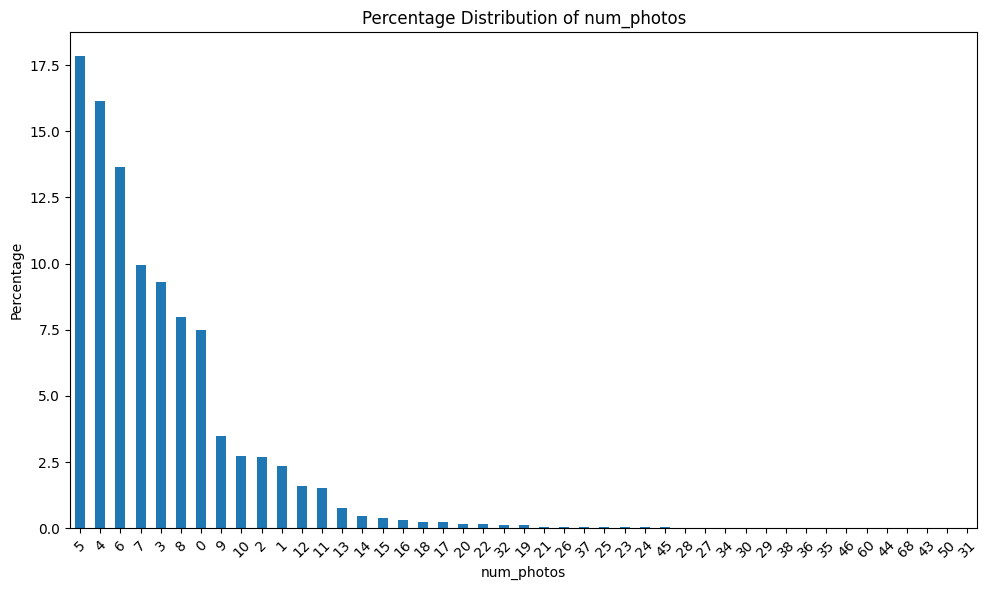

KeyError: 'laundry_score'

In [96]:
# # Check the percentage for each categorical variable

# # List of categorical variables
# categorical_vars = ['interest_level', 'borough_cat', 'num_photos']

# for var in categorical_vars:
#     # Calculate the percentage for each category
#     percentage = rent[var].value_counts(normalize=True) * 100
    
#     print(f"\nPercentage distribution for {var}:")
#     print(percentage)
    
#     # Visualize the distribution
#     plt.figure(figsize=(10, 6))
#     percentage.plot(kind='bar')
#     plt.title(f'Percentage Distribution of {var}')
#     plt.xlabel(var)
#     plt.ylabel('Percentage')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

# # Check the percentage for binary categorical variables
# binary_vars = ['laundry_score', 'pet_friendly_score', 'interior_score', 
#                'amenities_outdoor_score', 'outdoor_score', 'old_building_score', 
#                'new_building_score']

# for var in binary_vars:
#     # Calculate the percentage for each category
#     percentage = rent[var].value_counts(normalize=True) * 100
    
#     print(f"\nPercentage distribution for {var}:")
#     print(percentage)
    
#     # Visualize the distribution
#     plt.figure(figsize=(8, 6))
#     percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90)
#     plt.title(f'Percentage Distribution of {var}')
#     plt.ylabel('')
#     plt.tight_layout()
#     plt.show()

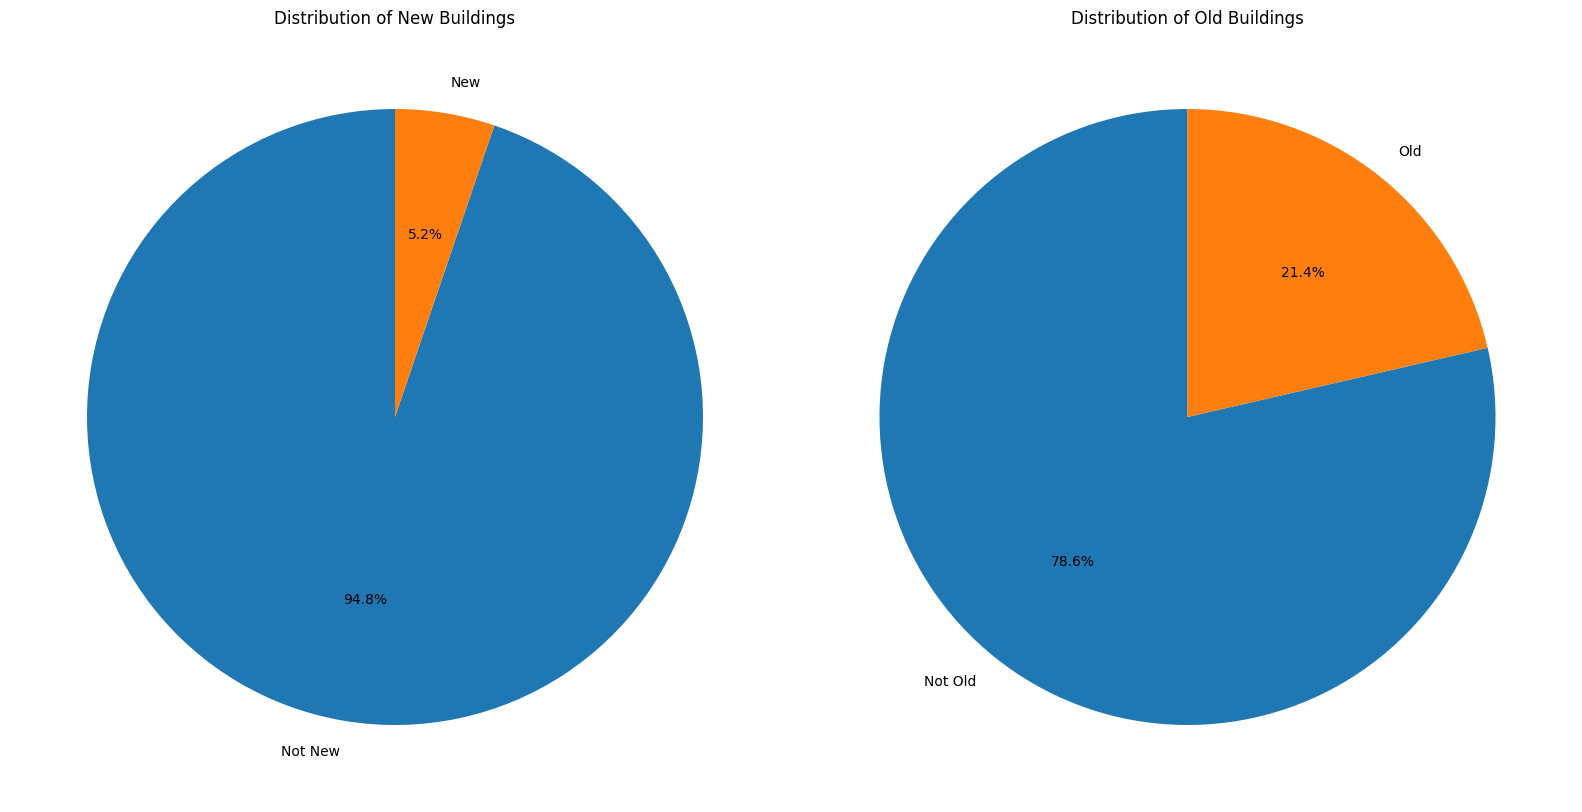

Percentage of New Buildings: 5.226618034111868 %
Percentage of Old Buildings: 21.395560897768014 %


In [97]:
# Create pie charts for new_building_score and old_building_score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for new_building_score
new_building_counts = rent['new_building_score'].value_counts()
ax1.pie(new_building_counts.values, labels=['Not New', 'New'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Distribution of New Buildings')

# Pie chart for old_building_score
old_building_counts = rent['old_building_score'].value_counts()
ax2.pie(old_building_counts.values, labels=['Not Old', 'Old'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Distribution of Old Buildings')

plt.tight_layout()
plt.show()

# Print percentages
print("Percentage of New Buildings:", (new_building_counts[1] / len(rent)) * 100, "%")
print("Percentage of Old Buildings:", (old_building_counts[1] / len(rent)) * 100, "%")


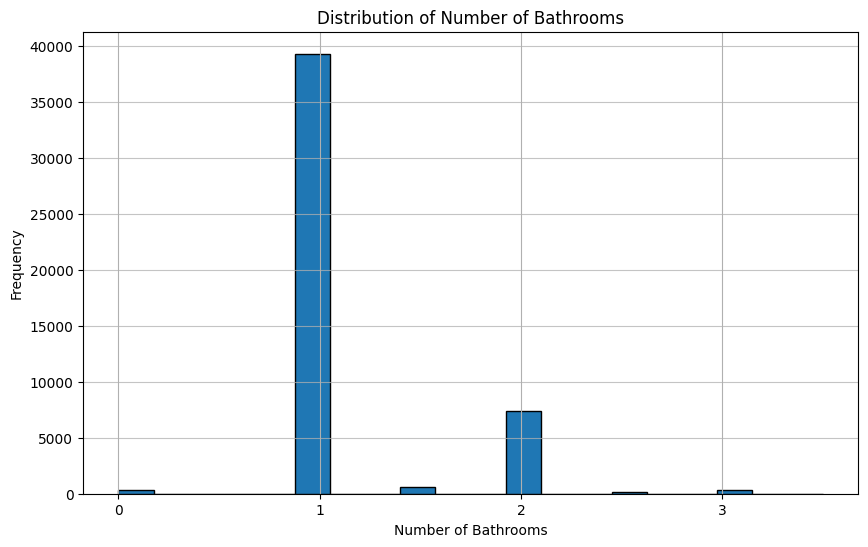

count    48253.000000
mean         1.175430
std          0.415307
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.500000
Name: bathrooms, dtype: float64

Number of listings with more than 3 bathrooms: 14

Sample of listings with unusual number of bathrooms:
       bathrooms  bedrooms   price
1054         3.5       4.0  5495.0
6376         3.5       4.0  8000.0
8779         3.5       4.0  4200.0
10812        3.5       5.0  8200.0
14401        3.5       3.0  9000.0


In [98]:
# Check the distribution of bathrooms
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
rent['bathrooms'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.xticks(range(0, int(rent['bathrooms'].max()) + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

# Print summary statistics for bathrooms
print(rent['bathrooms'].describe())

# Check for any unusual values
unusual_bathrooms = rent[rent['bathrooms'] > 3]
print(f"\nNumber of listings with more than 3 bathrooms: {len(unusual_bathrooms)}")
if len(unusual_bathrooms) > 0:
    print("\nSample of listings with unusual number of bathrooms:")
    print(unusual_bathrooms[['bathrooms', 'bedrooms', 'price']].head())



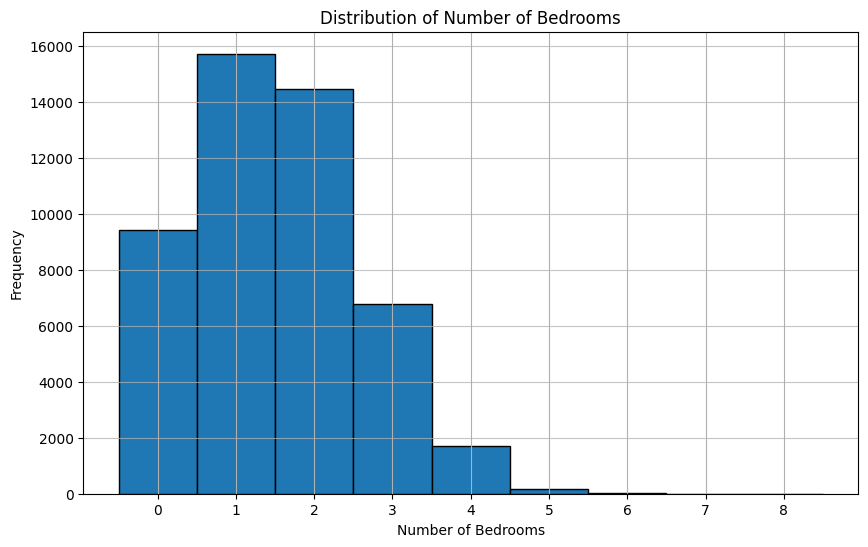

count    48253.000000
mean         1.505896
std          1.087996
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: bedrooms, dtype: float64

Number of data points for each bedroom category:
bedrooms
0.0     9435
1.0    15717
2.0    14450
3.0     6774
4.0     1693
5.0      154
6.0       28
7.0        1
8.0        1
Name: count, dtype: int64

Number of listings with more than 4 bedrooms: 184

Sample of listings with unusual number of bedrooms:
      bedrooms  bathrooms   price
141        5.0        2.0  7477.0
317        5.0        2.0  7995.0
601        5.0        2.0  8100.0
1291       5.0        2.0  5500.0
1426       5.0        2.0  6500.0


In [99]:
# Check the distribution of bedrooms
plt.figure(figsize=(10, 6))
rent['bedrooms'].hist(bins=range(0, int(rent['bedrooms'].max()) + 2), edgecolor='black', align='left')
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.xticks(range(0, int(rent['bedrooms'].max()) + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

# Print summary statistics for bedrooms
print(rent['bedrooms'].describe())

# Count the number of data points for each bedroom category
bedroom_counts = rent['bedrooms'].value_counts().sort_index()
print("\nNumber of data points for each bedroom category:")
print(bedroom_counts)

# Check for any unusual values
unusual_bedrooms = rent[rent['bedrooms'] > 4]
print(f"\nNumber of listings with more than 4 bedrooms: {len(unusual_bedrooms)}")
if len(unusual_bedrooms) > 0:
    print("\nSample of listings with unusual number of bedrooms:")
    print(unusual_bedrooms[['bedrooms', 'bathrooms', 'price']].head())



Updated summary statistics for bedrooms after removal:
count    48069.000000
mean         1.491835
std          1.065685
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: bedrooms, dtype: float64


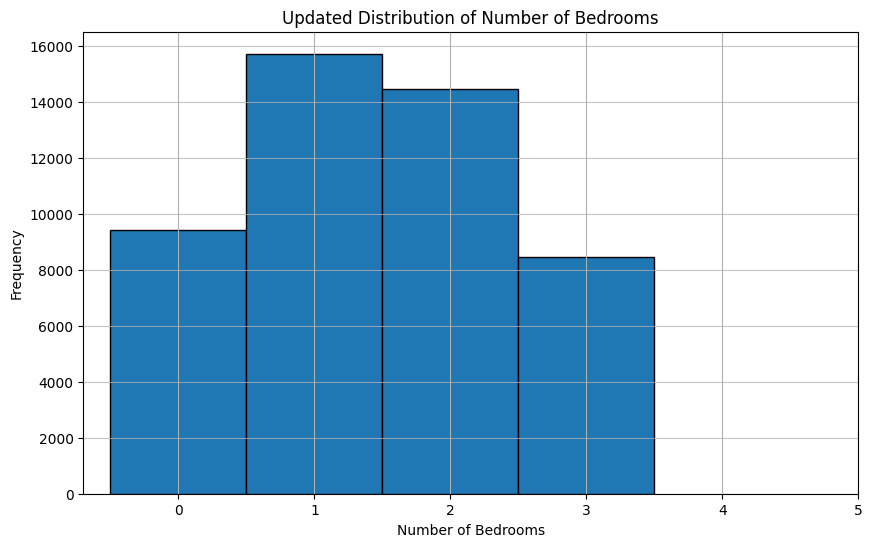


Updated number of data points for each bedroom category:
bedrooms
0.0     9435
1.0    15717
2.0    14450
3.0     6774
4.0     1693
Name: count, dtype: int64

Number of data points removed: 184


In [100]:
# Remove any data point with 5 or greater bedrooms
rent = rent[rent['bedrooms'] < 5]

# Print the updated summary statistics for bedrooms
print("\nUpdated summary statistics for bedrooms after removal:")
print(rent['bedrooms'].describe())

# Show the updated distribution of bedrooms
plt.figure(figsize=(10, 6))
rent['bedrooms'].hist(bins=range(0, 5), edgecolor='black', align='left')
plt.title('Updated Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.xticks(range(0, 6))
plt.grid(axis='y', alpha=0.75)
plt.show()

# Print the updated number of data points for each bedroom category
updated_bedroom_counts = rent['bedrooms'].value_counts().sort_index()
print("\nUpdated number of data points for each bedroom category:")
print(updated_bedroom_counts)

# Calculate the number of removed data points
removed_count = len(unusual_bedrooms)
print(f"\nNumber of data points removed: {removed_count}")


### Linear Regression, ANOVA, and Checking if scores improve model

In [101]:
rent.head()


,bedrooms,bathrooms,latitude,longitude,price,features,interest_level,display_address,photos,cleaned_features,...,laundry_in_unit,front_desk_amenities_score,pet_friendly_score,interior_score,old_building_score,new_building_score,new_building,old_building,borough_cat,num_photos
0,1.0,1.0,40.7108,-73.9539,2400.0,"[Dining Room, Pre-War, Laundry in Building, Di...",medium,145 Borinquen Place,[https://photos.renthop.com/2/7170325_3bb5ac84...,"[dining room, prewar, laundry in building, dis...",...,0,0,1,1,1,0,0,1,4,12
1,2.0,1.0,40.7513,-73.9722,3800.0,"[Doorman, Elevator, Laundry in Building, Dishw...",low,East 44th,[https://photos.renthop.com/2/7092344_7663c19a...,"[doorman, elevator, laundry in building, dishw...",...,0,1,0,1,0,0,1,0,4,6
2,2.0,1.0,40.7575,-73.9625,3495.0,"[Doorman, Elevator, Laundry in Building, Laund...",medium,East 56th Street,[https://photos.renthop.com/2/7158677_c897a134...,"[doorman, elevator, laundry in building, laund...",...,1,1,0,1,0,0,1,0,4,6
3,3.0,1.5,40.7145,-73.9425,3000.0,[],medium,Metropolitan Avenue,[https://photos.renthop.com/2/7211212_1ed4542e...,[],...,0,0,0,0,0,0,0,0,4,5
4,0.0,1.0,40.7439,-73.9743,2795.0,"[Doorman, Elevator, Fitness Center, Laundry in...",low,East 34th Street,[https://photos.renthop.com/2/7225292_901f1984...,"[doorman, elevator, fitness center, laundry in...",...,0,1,0,0,0,0,1,0,4,4


In [ ]:
rent.head()

,bedrooms,bathrooms,latitude,longitude,price,features,interest_level,display_address,photos,cleaned_features,other_features_score,laundry_in_unit,new_building,old_building,borough_cat
0,1.0,1.0,40.7108,-73.9539,2400.0,"[Dining Room, Pre-War, Laundry in Building, Di...",medium,145 Borinquen Place,['https://photos.renthop.com/2/7170325_3bb5ac8...,"[dining room, prewar, laundry in building, dis...",0,0,0,1,4
1,2.0,1.0,40.7513,-73.9722,3800.0,"[Doorman, Elevator, Laundry in Building, Dishw...",low,East 44th,['https://photos.renthop.com/2/7092344_7663c19...,"[doorman, elevator, laundry in building, dishw...",0,0,1,0,4
2,2.0,1.0,40.7575,-73.9625,3495.0,"[Doorman, Elevator, Laundry in Building, Laund...",medium,East 56th Street,['https://photos.renthop.com/2/7158677_c897a13...,"[doorman, elevator, laundry in building, laund...",0,1,1,0,4
3,3.0,1.5,40.7145,-73.9425,3000.0,[],medium,Metropolitan Avenue,['https://photos.renthop.com/2/7211212_1ed4542...,[],0,0,0,0,4
4,0.0,1.0,40.7439,-73.9743,2795.0,"[Doorman, Elevator, Fitness Center, Laundry in...",low,East 34th Street,['https://photos.renthop.com/2/7225292_901f198...,"[doorman, elevator, fitness center, laundry in...",0,0,1,0,4


In [102]:
# Select features for regression
features = ['bedrooms', 'bathrooms']
categorical_features = ['borough_cat','other_features_score', 
            'laundry_score', 'pet_friendly_score', 'interior_score', 'amenities_outdoor_score', 'old_building_score', 'new_building_score']
X = rent[features]
y = rent['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Import necessary libraries
from statsmodels.formula.api import ols
import statsmodels.api as sm


formula = 'price ~ latitude + longitude + bedrooms + bathrooms + C(new_building) + C(old_building) + C(interest_level) + num_photos'
#formula = 'price ~ latitude + longitude + bedrooms + bathrooms + C(other_features_score) + C(laundry_score) + C(pet_friendly_score) + C(interior_score) + C(amenities_outdoor_score) + C(old_building_score) + C(new_building_score)'


ols_model = ols(formula, data=rent).fit()

# Print the summary of the OLS regression
print(ols_model.summary())

# Calculate VIF for multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("\nVariance Inflation Factors:")
print(vif_data.sort_values('VIF', ascending=False))

# # Create and train the model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R-squared Score: {r2}")

# # Print feature coefficients
# for feature, coef in zip(features, model.coef_):
#     print(f"{feature}: {coef}")

# # Sort features by absolute coefficient value to see most impactful features
# feature_importance = sorted(zip(features, np.abs(model.coef_)), key=lambda x: x[1], reverse=True)
# print("\nFeatures sorted by importance:")
# for feature, importance in feature_importance:
#     print(f"{feature}: {importance}")



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     8821.
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:47:16   Log-Likelihood:            -3.9221e+05
No. Observations:               48069   AIC:                         7.844e+05
Df Residuals:                   48059   BIC:                         7.845e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

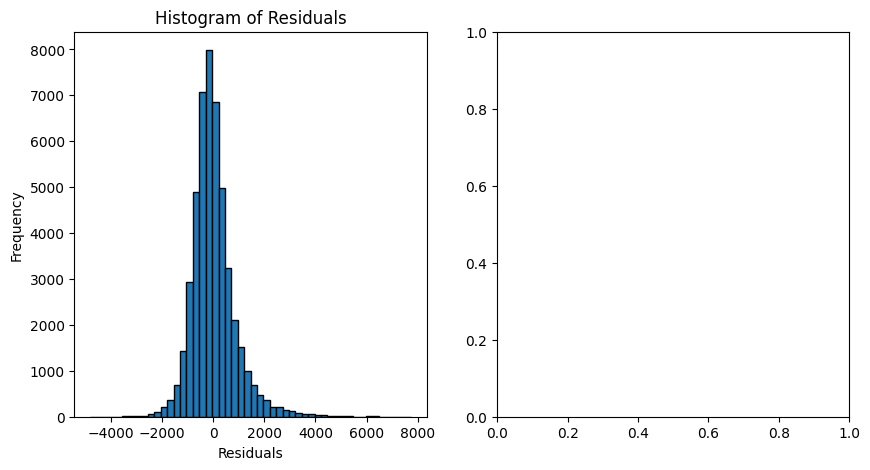

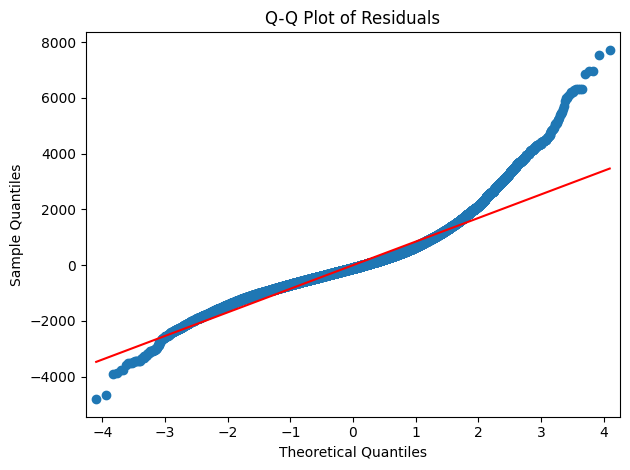

In [107]:
## Plot histogram of residuals and QQ plot

# Calculate residuals
residuals = ols_model.resid

# Plot histogram of residuals
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# QQ plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

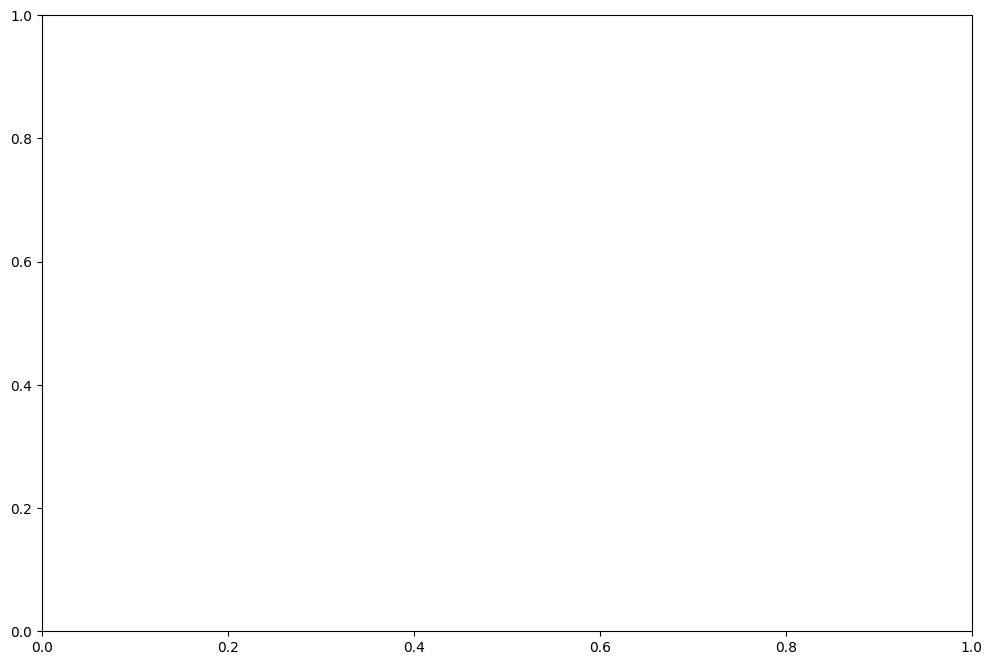

In [109]:
# # import statsmodels.api as sm
# # from statsmodels.graphics.regressionplots import influence_plot
# # import numpy as np

# # Assuming 'ols_model' is your fitted OLS model
# # If not, you may need to refit the model:
# # ols_model = sm.OLS(y, X).fit()

# # Influence Plot
# fig, ax = plt.subplots(figsize=(12, 8))
# influence_plot(ols_model, ax=ax, criterion="cooks")
# plt.title("Influence Plot")
# plt.tight_layout()
# plt.show()

# # Cook's Distance
# (c, p) = ols_model.get_influence().cooks_distance
# fig, ax = plt.subplots(figsize=(12, 8))
# ax.stem(np.arange(len(c)), c, markerfmt=",")
# ax.set_title("Cook's Distance")
# ax.set_xlabel("Observation")
# ax.set_ylabel("Cook's Distance")
# plt.show()

# # Identify potential outliers
# threshold = 4 / len(ols_model.fittedvalues)  # Common rule of thumb
# outliers = c > threshold
# print(f"Number of potential outliers: {outliers.sum()}")
# print("Indices of potential outliers:")
# print(np.where(outliers)[0])

# # Print details of top 10 influential points
# influence = ols_model.get_influence()
# sorted_idx = np.argsort(c)[::-1]
# print("\nTop 10 influential points:")
# for idx in sorted_idx[:10]:
#     print(f"Index: {idx}, Cook's Distance: {c[idx]:.4f}, Leverage: {influence.hat_matrix_diag[idx]:.4f}")


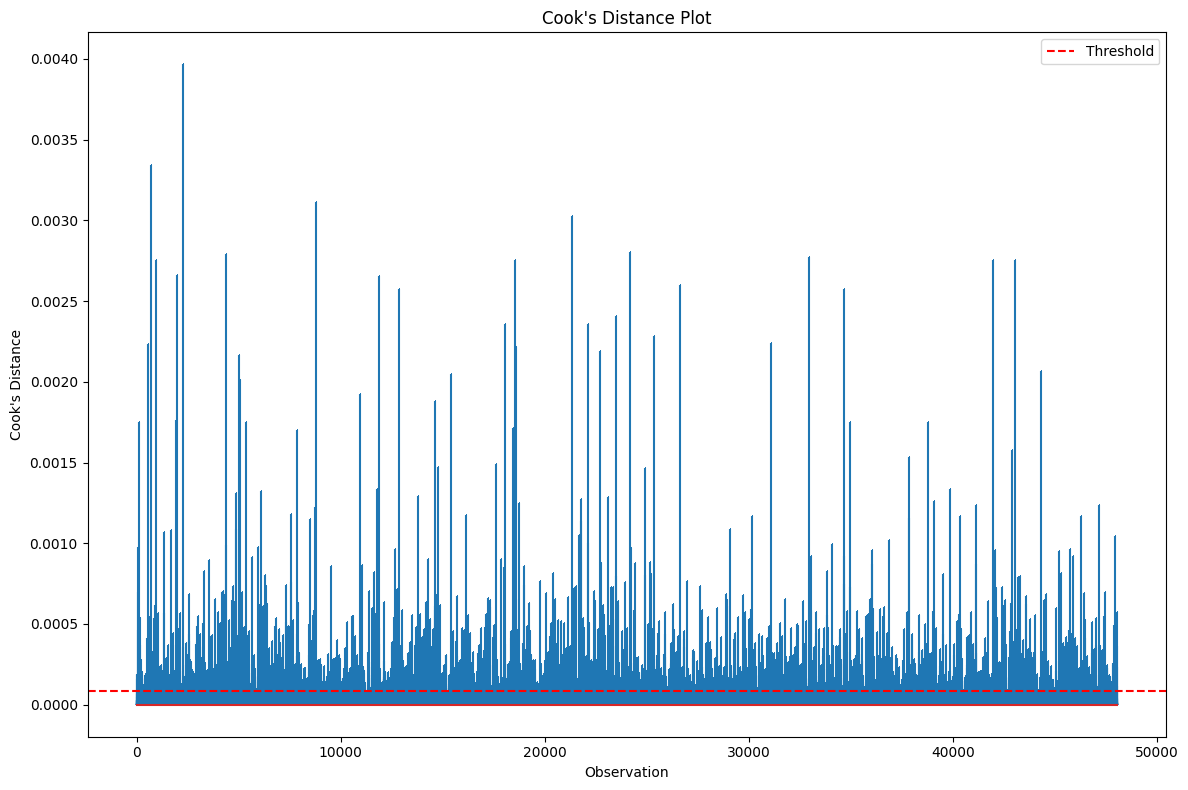

Number of potential outliers: 3106
Percentage of potential outliers: 6.46%

Top 10 influential points:
Index: 2264, Cook's Distance: 0.0040, Leverage: 0.0005
Index: 707, Cook's Distance: 0.0033, Leverage: 0.0004
Index: 8778, Cook's Distance: 0.0031, Leverage: 0.0005
Index: 21334, Cook's Distance: 0.0030, Leverage: 0.0027
Index: 24205, Cook's Distance: 0.0028, Leverage: 0.0027
Index: 4382, Cook's Distance: 0.0028, Leverage: 0.0026
Index: 32932, Cook's Distance: 0.0028, Leverage: 0.0028
Index: 41976, Cook's Distance: 0.0028, Leverage: 0.0005
Index: 18545, Cook's Distance: 0.0028, Leverage: 0.0005
Index: 43062, Cook's Distance: 0.0028, Leverage: 0.0005


In [110]:
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'ols_model' is your fitted OLS model
# If not, you may need to refit the model:
# ols_model = sm.OLS(y, X).fit()

# Cook's Distance
(c, p) = ols_model.get_influence().cooks_distance

# Create Cook's Distance plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.stem(np.arange(len(c)), c, markerfmt=",")
ax.set_title("Cook's Distance Plot")
ax.set_xlabel("Observation")
ax.set_ylabel("Cook's Distance")

# Add a threshold line
threshold = 4 / len(ols_model.fittedvalues)  # Common rule of thumb
ax.axhline(y=threshold, color='r', linestyle='--', label='Threshold')

plt.legend()
plt.tight_layout()
plt.show()

# Print summary of potential outliers
outliers = c > threshold
print(f"Number of potential outliers: {outliers.sum()}")
print(f"Percentage of potential outliers: {outliers.sum() / len(c) * 100:.2f}%")

# Print details of top 10 influential points
influence = ols_model.get_influence()
sorted_idx = np.argsort(c)[::-1]
print("\nTop 10 influential points:")
for idx in sorted_idx[:10]:
    print(f"Index: {idx}, Cook's Distance: {c[idx]:.4f}, Leverage: {influence.hat_matrix_diag[idx]:.4f}")


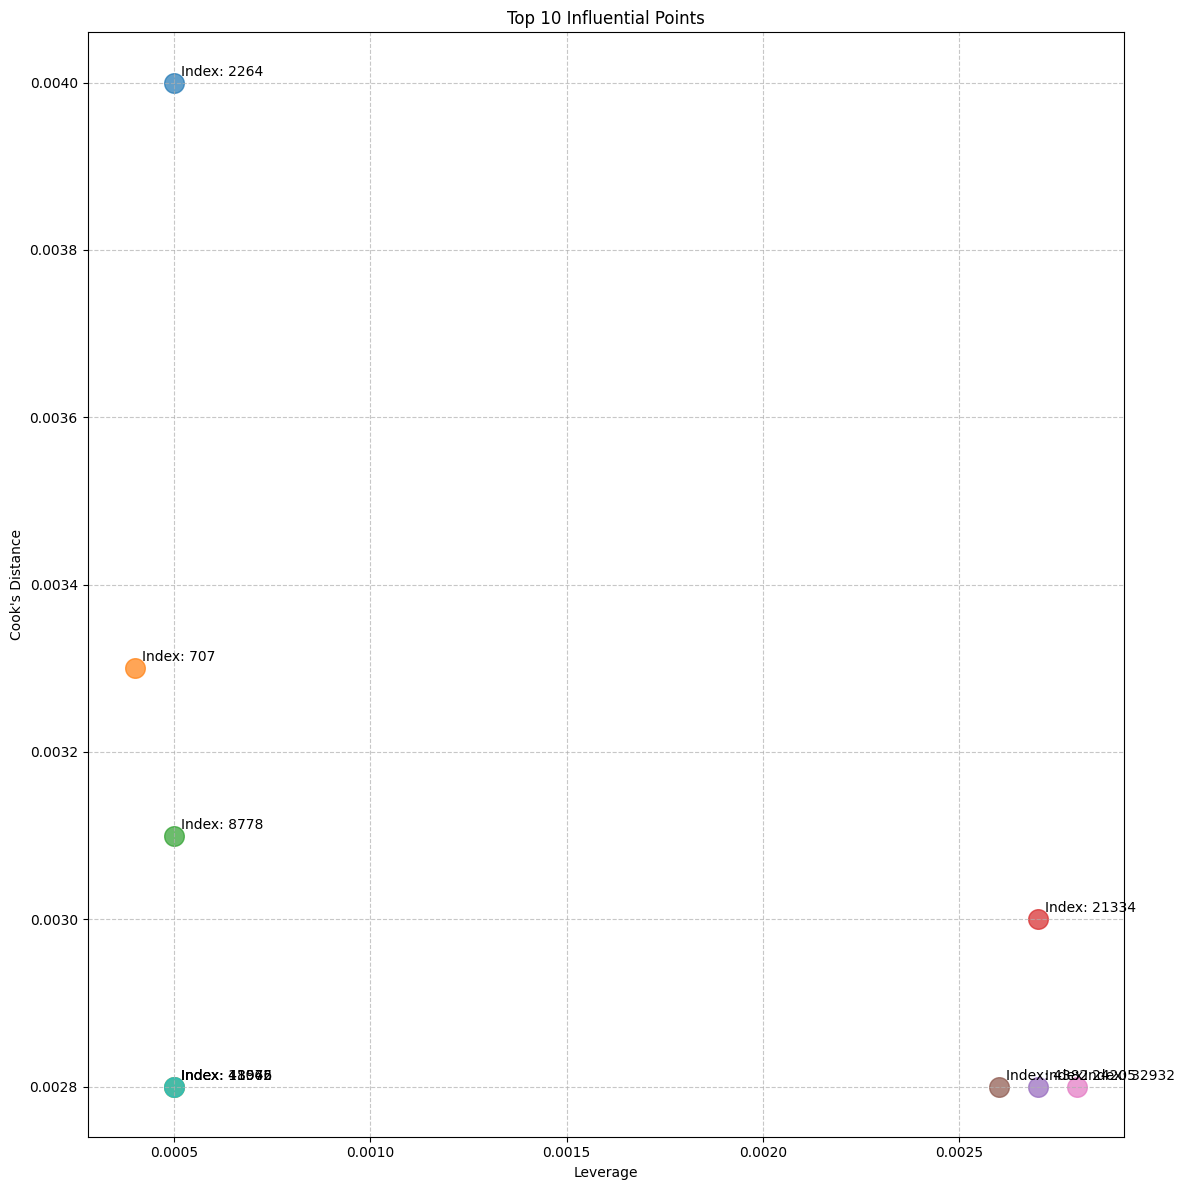

In [113]:
# Define the top 10 influential points
top_10_points = [
    (2264, 0.0040, 0.0005),
    (707, 0.0033, 0.0004),
    (8778, 0.0031, 0.0005),
    (21334, 0.0030, 0.0027),
    (24205, 0.0028, 0.0027),
    (4382, 0.0028, 0.0026),
    (32932, 0.0028, 0.0028),
    (41976, 0.0028, 0.0005),
    (18545, 0.0028, 0.0005),
    (43062, 0.0028, 0.0005)
]

fig, ax = plt.subplots(figsize=(12, 12))

# Plot each point
for index, cook_d, leverage in top_10_points:
    ax.scatter(leverage, cook_d, s=200, alpha=0.7)
    ax.annotate(f'Index: {index}', (leverage, cook_d), xytext=(5, 5), 
                textcoords='offset points')

ax.set_xlabel("Leverage")
ax.set_ylabel("Cook's Distance")
ax.set_title("Top 10 Influential Points")

# Add a grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
idx

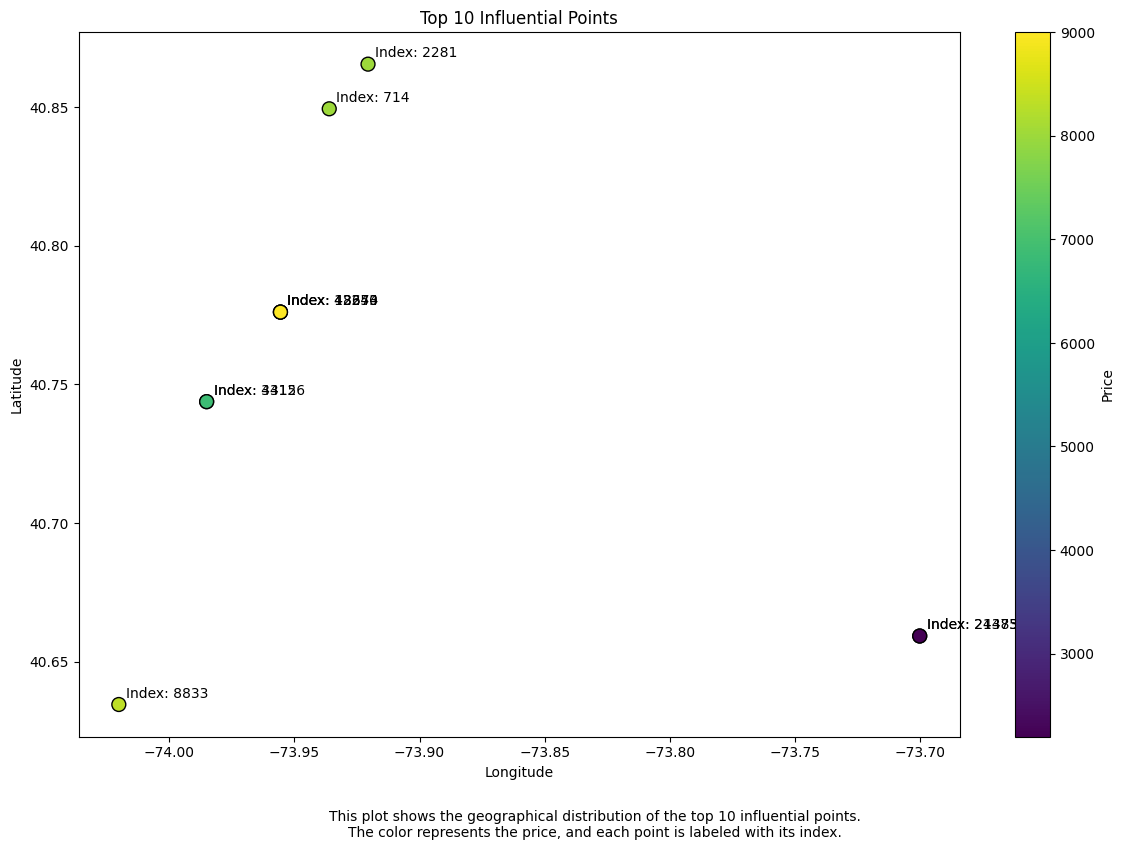

In [114]:
# Get the top 10 influential points
top_10_indices = sorted_idx[:10]

# Extract the data for these points
top_10_data = rent.iloc[top_10_indices]

# Create the plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(top_10_data['longitude'], top_10_data['latitude'], 
                      c=top_10_data['price'], s=100, cmap='viridis', 
                      edgecolor='black', linewidth=1)

# Add labels for each point
for idx, row in top_10_data.iterrows():
    plt.annotate(f"Index: {idx}", (row['longitude'], row['latitude']), 
                 xytext=(5, 5), textcoords='offset points')

# Customize the plot
plt.title("Top 10 Influential Points")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
cbar = plt.colorbar(scatter)
cbar.set_label("Price")

# Add a brief description
plt.figtext(0.5, -0.05, 
            "This plot shows the geographical distribution of the top 10 influential points.\n"
            "The color represents the price, and each point is labeled with its index.",
            ha="center", fontsize=10, wrap=True)

plt.tight_layout()
plt.show()

In [ ]:
# R

In [103]:
# import itertools
# from statsmodels.formula.api import ols

# # Define all possible features
# all_features = ['latitude', 'longitude', 'bedrooms', 'bathrooms', 'C(laundry_score)', 
#                 'C(pet_friendly_score)', 'C(interior_score)', 
#                 'C(amenities_outdoor_score)', 'C(old_building_score)', 
#                 'C(new_building_score)']

# # Initialize variables to store the best model
# best_adj_r2 = -float('inf')
# best_formula = ''

# # Loop through all possible combinations of features
# for r in range(1, len(all_features) + 1):
#     for combination in itertools.combinations(all_features, r):
#         # Create the formula for this combination
#         current_formula = 'price ~ ' + ' + '.join(combination)
        
#         # Fit the model
#         current_model = ols(current_formula, data=rent).fit()
        
#         # Check if this model has a higher adjusted R-squared
#         if current_model.rsquared_adj > best_adj_r2:
#             best_adj_r2 = current_model.rsquared_adj
#             best_formula = current_formula

# # Print the best model
# print(f"Best formula: {best_formula}")
# print(f"Best adjusted R-squared: {best_adj_r2}")

# # Fit the best model and print its summary
# best_model = ols(best_formula, data=rent).fit()
# print(best_model.summary())


PatsyError: Error evaluating factor: NameError: name 'laundry_score' is not defined
    price ~ C(laundry_score)
            ^^^^^^^^^^^^^^^^

Type II ANOVA Table:
                                  sum_sq       df             F         PR(>F)
C(borough_cat)              1.539472e+09      4.0    431.690138   0.000000e+00
C(other_features_score)     6.136134e+07      1.0     68.826426   1.102808e-16
C(laundry_score)            9.675001e+08      1.0   1085.203993  2.296247e-235
C(pet_friendly_score)       2.010146e+08      1.0    225.469605   7.566673e-51
C(interior_score)           2.339759e+07      1.0     26.244086   3.020357e-07
C(amenities_outdoor_score)  1.586705e+09      1.0   1779.739861   0.000000e+00
C(outdoor_score)            7.041871e+06      1.0      7.898569   4.949393e-03
C(old_building_score)       5.411262e+07      1.0     60.695835   6.794135e-15
C(new_building_score)       1.891367e+08      1.0    212.146626   5.914083e-48
bedrooms                    7.634485e+09      1.0   8563.279709   0.000000e+00
bathrooms                   1.135154e+10      1.0  12732.545352   0.000000e+00
Residual                    4.2

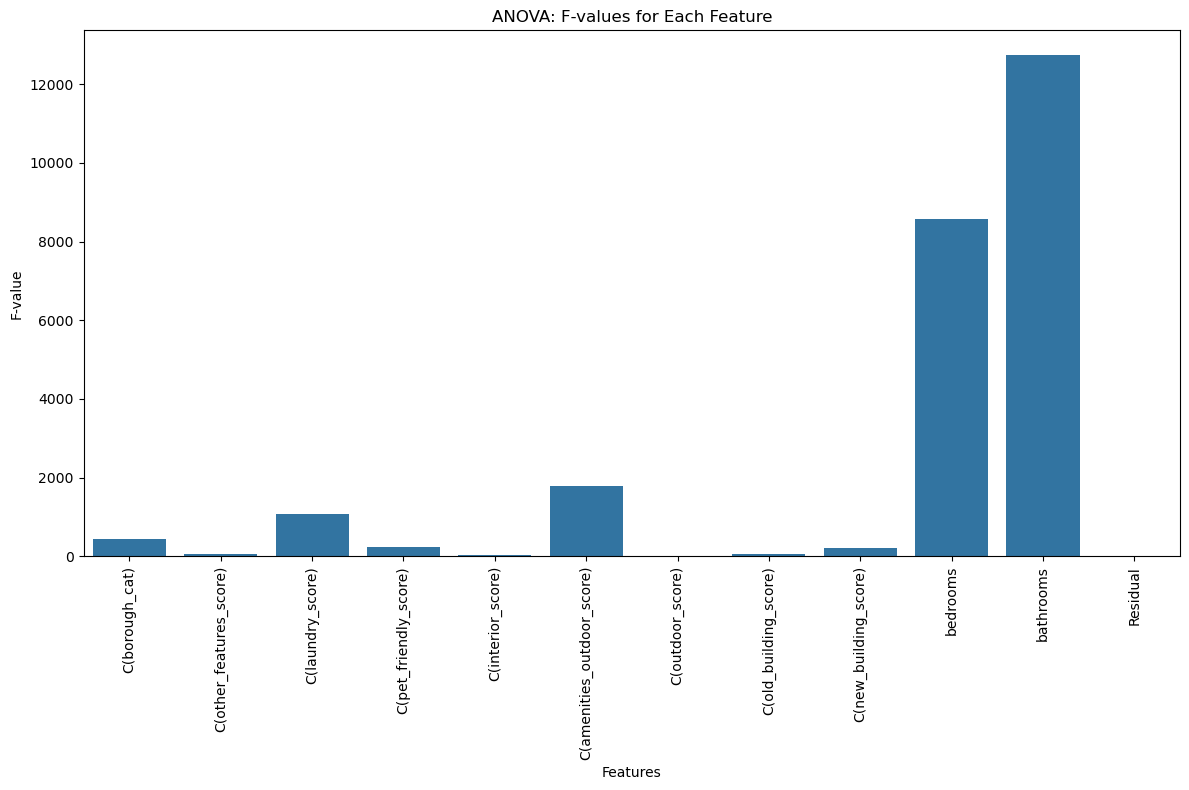

In [58]:
# # Perform Type II ANOVA
# from statsmodels.formula.api import ols
# import statsmodels.api as sm

# # Prepare the data for ANOVA
# #model_formula = 'price ~ ' + ' + '.join(features)  + ' + C(borough_cat)'
# anova_model = ols(formula, data=rent).fit()

# # Generate ANOVA table (Type II)
# anova_table = sm.stats.anova_lm(anova_model, typ=2)

# print("Type II ANOVA Table:")
# print(anova_table)

# # Visualize ANOVA results
# plt.figure(figsize=(12, 8))
# sns.barplot(x=anova_table.index, y=anova_table['F'])
# plt.title('ANOVA: F-values for Each Feature')
# plt.xlabel('Features')
# plt.ylabel('F-value')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()


In [25]:


# # Prepare the data for ANOVA
# model_formula = 'price ~ ' + ' + '.join(features)
# anova_model = ols(model_formula, data=rent).fit()

# # Generate ANOVA table
# anova_table = sm.stats.anova_lm(anova_model, typ=2)
# print("ANOVA Table:")
# print(anova_table)

# # Visualize feature importance
# plt.figure(figsize=(12, 8))
# sns.barplot(x=[coef for _, coef in feature_importance], 
#             y=[feature for feature, _ in feature_importance])
# plt.title('Feature Importance in Price Prediction')
# plt.xlabel('Absolute Coefficient Value')
# plt.ylabel('Features')
# plt.tight_layout()
# plt.show()

# # Visualize residuals
# residuals = y_test - y_pred
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=y_test, y=residuals)
# plt.title('Residuals vs Actual Price')
# plt.xlabel('Actual Price')
# plt.ylabel('Residuals')
# plt.axhline(y=0, color='r', linestyle='--')
# plt.tight_layout()
# plt.show()

# # Visualize predicted vs actual prices
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=y_test, y=y_pred)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
# plt.title('Predicted vs Actual Price')
# plt.xlabel('Actual Price')
# plt.ylabel('Predicted Price')
# plt.tight_layout()
# plt.show()

# # Distribution of residuals
# plt.figure(figsize=(10, 6))
# sns.histplot(residuals, kde=True)
# plt.title('Distribution of Residuals')
# plt.xlabel('Residuals')
# plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()


NameError: name 'ols' is not defined

R^2 score without score variables: 0.5892
R^2 score with score variables: 0.6113
Difference in R^2: 0.0221


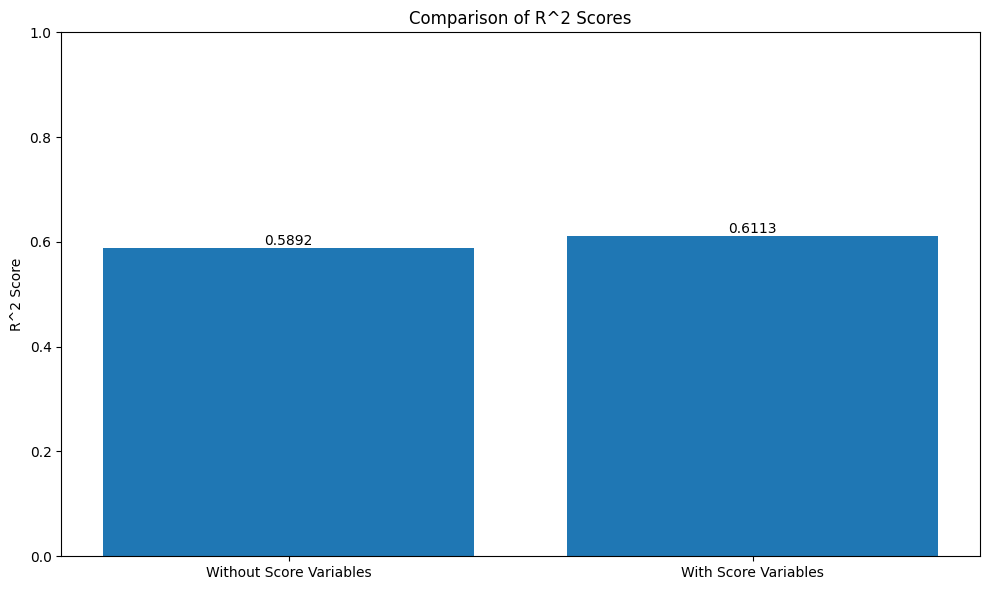

In [ ]:
# # Remove score variables and calculate R^2
# features_without_scores = [col for col in X.columns if not col.endswith('_score')]
# X_without_scores = X[features_without_scores]

# # Split the data
# X_train_without_scores, X_test_without_scores, y_train, y_test = train_test_split(X_without_scores, y, test_size=0.2, random_state=42)

# # Train the model without score variables
# model_without_scores = LinearRegression()
# model_without_scores.fit(X_train_without_scores, y_train)

# # Make predictions
# y_pred_without_scores = model_without_scores.predict(X_test_without_scores)

# # Calculate R^2 without score variables
# r2_without_scores = r2_score(y_test, y_pred_without_scores)
# print(f"R^2 score without score variables: {r2_without_scores:.4f}")

# # Train the model with all variables (including score variables)
# model_with_scores = LinearRegression()
# model_with_scores.fit(X_train, y_train)

# # Make predictions
# y_pred_with_scores = model_with_scores.predict(X_test)

# # Calculate R^2 with score variables
# r2_with_scores = r2_score(y_test, y_pred_with_scores)
# print(f"R^2 score with score variables: {r2_with_scores:.4f}")

# # Compare the results
# print(f"Difference in R^2: {r2_with_scores - r2_without_scores:.4f}")

# # Visualize the comparison
# plt.figure(figsize=(10, 6))
# labels = ['Without Score Variables', 'With Score Variables']
# r2_scores = [r2_without_scores, r2_with_scores]
# plt.bar(labels, r2_scores)
# plt.title('Comparison of R^2 Scores')
# plt.ylabel('R^2 Score')
# plt.ylim(0, 1)  # R^2 score ranges from 0 to 1
# for i, v in enumerate(r2_scores):
#     plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
# plt.tight_layout()
# plt.show()
